In [1]:
from icecream import ic
import pandas as pd
from dateutil.relativedelta import relativedelta
# from dhs_preprocessing_functions import *
from pandarallel import pandarallel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
# Initialization
pandarallel.initialize()

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
# folder: path = "/mnt/datadisk/data/surveys/DHS_final_raw_data/"
# work_dir = "/mnt/datadisk/data/Projects/water/pickles/"
input_dir = "/mnt/datadisk/data/Projects/water/inputs/"
# min_version = 3
overwrite_pqt = True
dataset_type = 'HR'  #, 'BR', 'CR', 'HW', 'IR', 'KR', 'MR', 'PR', 'AR'] ??['AN', 'FC, 'FP', 'HW', 'PV', 'SC'] < 25 surveys
add_str = '_wo_NANs'
group_by_col = 'adm2_gaul'
numeric_in_f = f"{input_dir}grouped_df_V3_{dataset_type}_{group_by_col}_numeric{add_str}.pkl"
string_in_f = f"{input_dir}grouped_df_V3_{dataset_type}_{group_by_col}_string{add_str}.pkl"
fewsNet_f = f"{input_dir}fewsnet_gaul_adm2.csv"

numeric_out_f = f"{input_dir}grouped_df_V3_{dataset_type}_{group_by_col}_numeric_joined_with_ipc{add_str}.pkl"
string_out_f = f"{input_dir}grouped_df_V3_{dataset_type}_{group_by_col}_string_joined_with_ipc{add_str}.pkl"
# cut_perc = 10

In [3]:
numeric_df = pd.read_pickle(numeric_in_f)
numeric_df

GEID_init               adm2_gaul           adm1_gaul adm0_gaul  year  \
0      AOGE52FL                  Ambaca        Kuanza Norte    Angola  2007   
1      AOGE52FL                  Amboim          Cuanza Sul    Angola  2006   
2      AOGE52FL                  Andulo                 Bie    Angola  2007   
3      AOGE52FL              Baia Farta            Benguela    Angola  2006   
4      AOGE52FL                 Balombo            Benguela    Angola  2006   
...         ...                     ...                 ...       ...   ...   
15247  ZWGE72FL              Umzingwane  Matabeleland South  Zimbabwe  2015   
15248  ZWGE72FL  Uzumba-Maramba-Pfungwe    Mashonaland East  Zimbabwe  2015   
15249  ZWGE72FL                    Zaka            Masvingo  Zimbabwe  2015   
15250  ZWGE72FL                  Zvimba    Mashonaland West  Zimbabwe  2015   
15251  ZWGE72FL              Zvishavane            Midlands  Zimbabwe  2015   

       month  number of household members: mean  \
0          3                           5.160000   
1         12                           5.280000   
2          1                           4.000000   
3         11                           5.208333   
4         12                           4.210526   
...      ...                                ...   
15247      7                           4.642857   
15248     10                           4.075949   
15249     10                           4.366337   
15250     11                           4.546154   
15251      7                           3.475610   

       number of household members: median  number of household members: std  \
0                                      5.0                          1.907878   
1                                      5.0                          2.282542   
2                                      4.0                          1.632993   
3                                      5.0                          2.283764   
4                                      4.0                          1.618605   
...                                    ...                               ...   
15247                                  4.0                          2.865006   
15248                                  4.0                          2.080262   
15249                                  4.0                          2.415462   
15250                                  4.0                          2.385718   
15251                                  3.0                          1.722943   

       number of household members: skewness  ...  \
0                                  -0.085945  ...   
1                                   0.784636  ...   
2                                   0.175781  ...   
3                                   0.498937  ...   
4                                   0.700442  ...   
...                                      ...  ...   
15247                               0.851328  ...   
15248                               0.586274  ...   
15249                               1.255670  ...   
15250                               0.920870  ...   
15251                               1.440426  ...   

       number of eligible men in hh: percentage of valid answers  \
0                                                    0.0           
1                                                    0.0           
2                                                    0.0           
3                                                    0.0           
4                                                    0.0           
...                                                  ...           
15247                                                0.0           
15248                                                0.0           
15249                                                0.0           
15250                                                0.0           
15251                                                0.0           

       number of children 5 a

In [4]:
food_security_df = pd.read_csv(fewsNet_f)
food_security_df.head()
ic(food_security_df.columns.to_list())
food_security_df = food_security_df[['adm2_name', 'month', 'year', 'CS', 'HA0']]
food_security_df['HA0'] = food_security_df['HA0'].fillna(0)
food_security_df['IPC + food help'] = food_security_df['CS'] + food_security_df['HA0']
food_security_df.drop(columns=['HA0'], inplace=True)
food_security_df.columns = ['adm2_name', 'month', 'year', 'IPC', 'IPC + food help']
food_security_df.sample(10)

/tmp/ipykernel_354428/901664503.py:1: DtypeWarning: Columns (26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  food_security_df = pd.read_csv(fewsNet_f)
ic| food_security_df.columns.to_list(): ['OBJECTID',
                                         'adm2_code',
                                         'adm2_name',
                                         'str2_year',
                                         'exp2_year',
                                         'adm1_code',
                                         'adm1_name',
                                         'status',
                                         'disp_area',
                                         'adm0_code',
                                         'adm0_name',
                                         'shape_leng',
                                         'FID_1',
                                         'Shape_Le_1',
                                     

adm2_name  month  year  IPC  IPC + food help
58095    Ikpoba-Okha      2  2022  1.0              1.0
53349          Bidio      2  2021  1.0              1.0
85241         Rubaga      6  2020  2.0              2.0
81126       Mawogola     12  2018  1.0              1.0
35943      Dunukofia      6  2016  1.0              1.0
24607       Goumadji      4  2014  1.0              1.0
51949   Amuwo Odofin      6  2020  2.0              2.0
26267     Gwagwalada      7  2014  1.0              1.0
101289       Betroka      6  2019  1.0              1.0
16581        Zondoma      7  2012  2.0              2.0

In [5]:

def aggregate_ipc(row, df, months_start_delta, months_end_delta, col_suffix):
    # Create datetime objects for the start and end dates
    # in_date = row['date']
    try:
        in_date = pd.to_datetime(f"{row['year']}-{row['month']}-01")
    except Exception as e:
        ic(row)
        ic(row['year'], row['month'])
        raise e
    if col_suffix == 'm':
        start_date = in_date + relativedelta(months=months_start_delta)
        end_date = in_date + relativedelta(months=months_end_delta)
    elif col_suffix == 'y':
        start_date = in_date + relativedelta(years=months_start_delta)
        end_date = in_date + relativedelta(years=months_end_delta)
    else:
        raise ValueError(f"col_suffix should be 'm' or 'y', not {col_suffix}")
    # Filter the data for the given time span and adm2_gaul
    # ic(row.index)
    # ic(df.columns.to_list())
    df_time_span = df[(df['date'] >= start_date) & (df['date'] < end_date) & (df['adm2_name'] == row['adm2_gaul'])]


    row[f'IPC: {months_start_delta}-{months_end_delta}{col_suffix}: mean'] = df_time_span['IPC'].mean()
    row[f'IPC: {months_start_delta}-{months_end_delta}{col_suffix}: max'] = df_time_span['IPC'].max()
    row[f'IPC: {months_start_delta}-{months_end_delta}{col_suffix}: min'] = df_time_span['IPC'].min()
    row[f'IPC: {months_start_delta}-{months_end_delta}{col_suffix}: median'] = round(df_time_span['IPC'].median(), 0)

    row[f'IPC + FH: {months_start_delta}-{months_end_delta}{col_suffix}: mean'] = df_time_span['IPC + food help'].mean()
    row[f'IPC + FH: {months_start_delta}-{months_end_delta}{col_suffix}: max'] = df_time_span['IPC + food help'].max()
    row[f'IPC + FH: {months_start_delta}-{months_end_delta}{col_suffix}: min'] = df_time_span['IPC + food help'].min()
    row[f'IPC + FH: {months_start_delta}-{months_end_delta}{col_suffix}: median'] = round(df_time_span['IPC + food help'].median(), 0)

    return row

# Convert year and month to datetime
food_security_df['date'] = pd.to_datetime(food_security_df[['year', 'month']].assign(day=1))
print(food_security_df.shape)
print(numeric_df.shape)

if not os.path.exists(numeric_out_f) or overwrite_pqt:
    # Apply the function for 0 to 6 months back
    for months_start_delta, months_end_delta, m_y_ind in [(0, 5, 'm'), (6, 12, 'm'), (1, 2, 'y'), (2, 4, 'y'), (4, 6, 'y'), (6, 7, 'y'), (6, 10, 'y'), (10, 15, 'y'), (15, 20, 'y'), (20, 25, 'y')]:
        numeric_df = numeric_df.parallel_apply(aggregate_ipc, axis=1, df=food_security_df, months_start_delta=months_start_delta, 
                                                months_end_delta=months_end_delta, col_suffix=m_y_ind)
    numeric_df.to_pickle(numeric_out_f)
else:
    numeric_df = pd.read_pickle(numeric_out_f)
numeric_df[numeric_df['IPC + FH: 15-20y: mean'].notna()]

(104386, 6)
(15252, 109)


GEID_init               adm2_gaul           adm1_gaul     adm0_gaul  \
32     AOGE52FL                    Dala           Lunda Sul        Angola   
287    BFGE32FL                    Bale   Boucle Du Mouhoun  Burkina Faso   
288    BFGE32FL                     Bam         Centre-nord  Burkina Faso   
289    BFGE32FL                   Banwa   Boucle Du Mouhoun  Burkina Faso   
290    BFGE32FL                  Bazega          Centre-sud  Burkina Faso   
...         ...                     ...                 ...           ...   
15122  ZWGE52FL              Umzingwane  Matabeleland South      Zimbabwe   
15123  ZWGE52FL  Uzumba-Maramba-Pfungwe    Mashonaland East      Zimbabwe   
15124  ZWGE52FL                    Zaka            Masvingo      Zimbabwe   
15125  ZWGE52FL                  Zvimba    Mashonaland West      Zimbabwe   
15126  ZWGE52FL              Zvishavane            Midlands      Zimbabwe   

       year  month  number of household members: mean  \
32     2006     11                           3.880000   
287    1999      2                           4.411765   
288    1998     12                           7.105634   
289    1999      1                           7.176471   
290    1999      2                           8.756757   
...     ...    ...                                ...   
15122  2005      9                           5.146067   
15123  2005     10                           3.847458   
15124  2005     11                           5.051095   
15125  2005     12                           4.294872   
15126  2005     12                           4.434211   

       number of household members: median  number of household members: std  \
32                                     4.0                          1.855622   
287                                    4.0                          2.425356   
288                                    6.0                          3.945925   
289                                    6.0                          4.632125   
290                                    8.0                          5.035460   
...                                    ...                               ...   
15122                                  5.0                          2.967822   
15123                                  4.0                          1.827129   
15124                                  5.0                          2.638296   
15125                                  4.0                          2.275303   
15126                                  4.0                          2.578555   

       number of household members: skewness  ...  IPC + FH: 15-20y: min  \
32                                  0.218260  ...                    2.0   
287                                 0.828844  ...                    1.0   
288                                 1.693518  ...                    1.0   
289                                 1.223493  ...                    1.0   
290                                 0.340908  ...                    1.0   
...                                      ...  ...                    ...   
15122                               0.788262  ...                    1.0   
15123                               0.381498  ...                    2.0   
15124                               0.769122  ...                    2.0   
15125                               0.767149  ...                    1.0   
15126                               1.250383  ...                    2.0   

       IPC + FH: 15-20y: median  IPC: 20-25y: mean  IPC: 20-25y: max  \
32                          2.0                NaN               NaN   
287                         1.0           1.470588               3.0   
288                         1.0           2.000000               2.0   
289                         1.0           1.000000               1.0   
290                         1.0           1.000000               1.0   
...                         ...                ...               ...   
15122             

In [6]:
nrdf =numeric_df[[c for c in numeric_df.columns if 'IPC' in c or 'month' in c or 'year' in c or 'adm2' in c]]
# show the amount of available IPC data for all IPC columns
for c in nrdf.columns:
    if 'IPC' in c and 'mean' in c:
        print(c, len(nrdf[nrdf[c].notnull()]))
numeric_df

IPC: 0-5m: mean 5007
IPC + FH: 0-5m: mean 5007
IPC: 6-12m: mean 4775
IPC + FH: 6-12m: mean 4775
IPC: 1-2y: mean 5124
IPC + FH: 1-2y: mean 5124
IPC: 2-4y: mean 5817
IPC + FH: 2-4y: mean 5817
IPC: 4-6y: mean 4812
IPC + FH: 4-6y: mean 4812
IPC: 6-7y: mean 4567
IPC + FH: 6-7y: mean 4567
IPC: 6-10y: mean 5525
IPC + FH: 6-10y: mean 5525
IPC: 10-15y: mean 3610
IPC + FH: 10-15y: mean 3610
IPC: 15-20y: mean 1367
IPC + FH: 15-20y: mean 1367
IPC: 20-25y: mean 540
IPC + FH: 20-25y: mean 540


GEID_init               adm2_gaul           adm1_gaul adm0_gaul  year  \
0      AOGE52FL                  Ambaca        Kuanza Norte    Angola  2007   
1      AOGE52FL                  Amboim          Cuanza Sul    Angola  2006   
2      AOGE52FL                  Andulo                 Bie    Angola  2007   
3      AOGE52FL              Baia Farta            Benguela    Angola  2006   
4      AOGE52FL                 Balombo            Benguela    Angola  2006   
...         ...                     ...                 ...       ...   ...   
15247  ZWGE72FL              Umzingwane  Matabeleland South  Zimbabwe  2015   
15248  ZWGE72FL  Uzumba-Maramba-Pfungwe    Mashonaland East  Zimbabwe  2015   
15249  ZWGE72FL                    Zaka            Masvingo  Zimbabwe  2015   
15250  ZWGE72FL                  Zvimba    Mashonaland West  Zimbabwe  2015   
15251  ZWGE72FL              Zvishavane            Midlands  Zimbabwe  2015   

       month  number of household members: mean  \
0          3                           5.160000   
1         12                           5.280000   
2          1                           4.000000   
3         11                           5.208333   
4         12                           4.210526   
...      ...                                ...   
15247      7                           4.642857   
15248     10                           4.075949   
15249     10                           4.366337   
15250     11                           4.546154   
15251      7                           3.475610   

       number of household members: median  number of household members: std  \
0                                      5.0                          1.907878   
1                                      5.0                          2.282542   
2                                      4.0                          1.632993   
3                                      5.0                          2.283764   
4                                      4.0                          1.618605   
...                                    ...                               ...   
15247                                  4.0                          2.865006   
15248                                  4.0                          2.080262   
15249                                  4.0                          2.415462   
15250                                  4.0                          2.385718   
15251                                  3.0                          1.722943   

       number of household members: skewness  ...  IPC + FH: 15-20y: min  \
0                                  -0.085945  ...                    NaN   
1                                   0.784636  ...                    NaN   
2                                   0.175781  ...                    NaN   
3                                   0.498937  ...                    NaN   
4                                   0.700442  ...                    NaN   
...                                      ...  ...                    ...   
15247                               0.851328  ...                    NaN   
15248                               0.586274  ...                    NaN   
15249                               1.255670  ...                    NaN   
15250                               0.920870  ...                    NaN   
15251                               1.440426  ...                    NaN   

       IPC + FH: 15-20y: median  IPC: 20-25y: mean  IPC: 20-25y: max  \
0                           NaN                NaN               NaN   
1                           NaN                NaN               NaN   
2                           NaN                NaN               NaN   
3                           NaN                NaN               NaN   
4                           NaN                NaN               NaN   
...                         ...                ...               ...   
15247                       NaN                NaN               N

In [7]:
# numeric_df.drop(columns=['year of interview_median', 'month of interview_median'], inplace=True)
# print(numeric_df.columns.to_list())
# numeric_df2 = numeric_df[[c for c in numeric_df.columns if not (('IPC + FH:' in c and 'mean' in c) and ('6-7y:' in c or '20-25y:' in c)) or ('IPC: ' not in c and 'mean' in c)]]
cols =[c for c in numeric_df.columns if 
                          (('IPC + FH:' in c and 'mean' in c) and not 
                           ('20-25y:' in c)) or 
                          (('IPC: ' not in c and 'IPC + FH:' not in c) and 'mean' in c)]
print(cols)
numeric_df2 = numeric_df[cols]
# Convert the result back to a DataFrame
numeric_df2 = pd.DataFrame(numeric_df2, columns=numeric_df2.columns)
# numeric_df2 = numeric_df[[c for c in numeric_df.columns if (('IPC + FH:' in c and 'mean' in c and not '20-25y:' in c and not '6-7y:' in c) or ('IPC: ' not in c and 'mean' in c))]]
# numeric_df2 = numeric_df[[c for c in numeric_df.columns if 'IPC + FH:' in c and 'mean' in c and not '20-25y:' in c and not '6-7y:' in c or ('IPC: ' not in c and 'mean' in c)]]# and not 'IPC + FH' in c]]
numeric_df2.columns.tolist()

['number of household members: mean', 'owns sheep: mean', 'number of eligible children for height and weight: mean', 'total adults measured: mean', 'number of mosquito bed nets: mean', 'owns rabbits: mean', 'number of eligible children for height & weight: mean', 'cluster altitude in meters: mean', 'number of eligible women in household: mean', 'number of eligible men in hh: mean', 'number of children 5 and under (de jure): mean', 'number of households sharing toilet: mean', 'hectares of agricultural land (1 decimal): mean', 'number of rooms used for sleeping: mean', 'owns goats: mean', 'owns horses/ donkeys/ mules: mean', 'time to get to water source (minutes): mean', 'owns cows/ bulls: mean', 'owns chickens/poultry: mean', 'IPC + FH: 0-5m: mean', 'IPC + FH: 6-12m: mean', 'IPC + FH: 1-2y: mean', 'IPC + FH: 2-4y: mean', 'IPC + FH: 4-6y: mean', 'IPC + FH: 6-7y: mean', 'IPC + FH: 6-10y: mean', 'IPC + FH: 10-15y: mean', 'IPC + FH: 15-20y: mean']


['number of household members: mean',
 'owns sheep: mean',
 'number of eligible children for height and weight: mean',
 'total adults measured: mean',
 'number of mosquito bed nets: mean',
 'owns rabbits: mean',
 'number of eligible children for height & weight: mean',
 'cluster altitude in meters: mean',
 'number of eligible women in household: mean',
 'number of eligible men in hh: mean',
 'number of children 5 and under (de jure): mean',
 'number of households sharing toilet: mean',
 'hectares of agricultural land (1 decimal): mean',
 'number of rooms used for sleeping: mean',
 'owns goats: mean',
 'owns horses/ donkeys/ mules: mean',
 'time to get to water source (minutes): mean',
 'owns cows/ bulls: mean',
 'owns chickens/poultry: mean',
 'IPC + FH: 0-5m: mean',
 'IPC + FH: 6-12m: mean',
 'IPC + FH: 1-2y: mean',
 'IPC + FH: 2-4y: mean',
 'IPC + FH: 4-6y: mean',
 'IPC + FH: 6-7y: mean',
 'IPC + FH: 6-10y: mean',
 'IPC + FH: 10-15y: mean',
 'IPC + FH: 15-20y: mean']

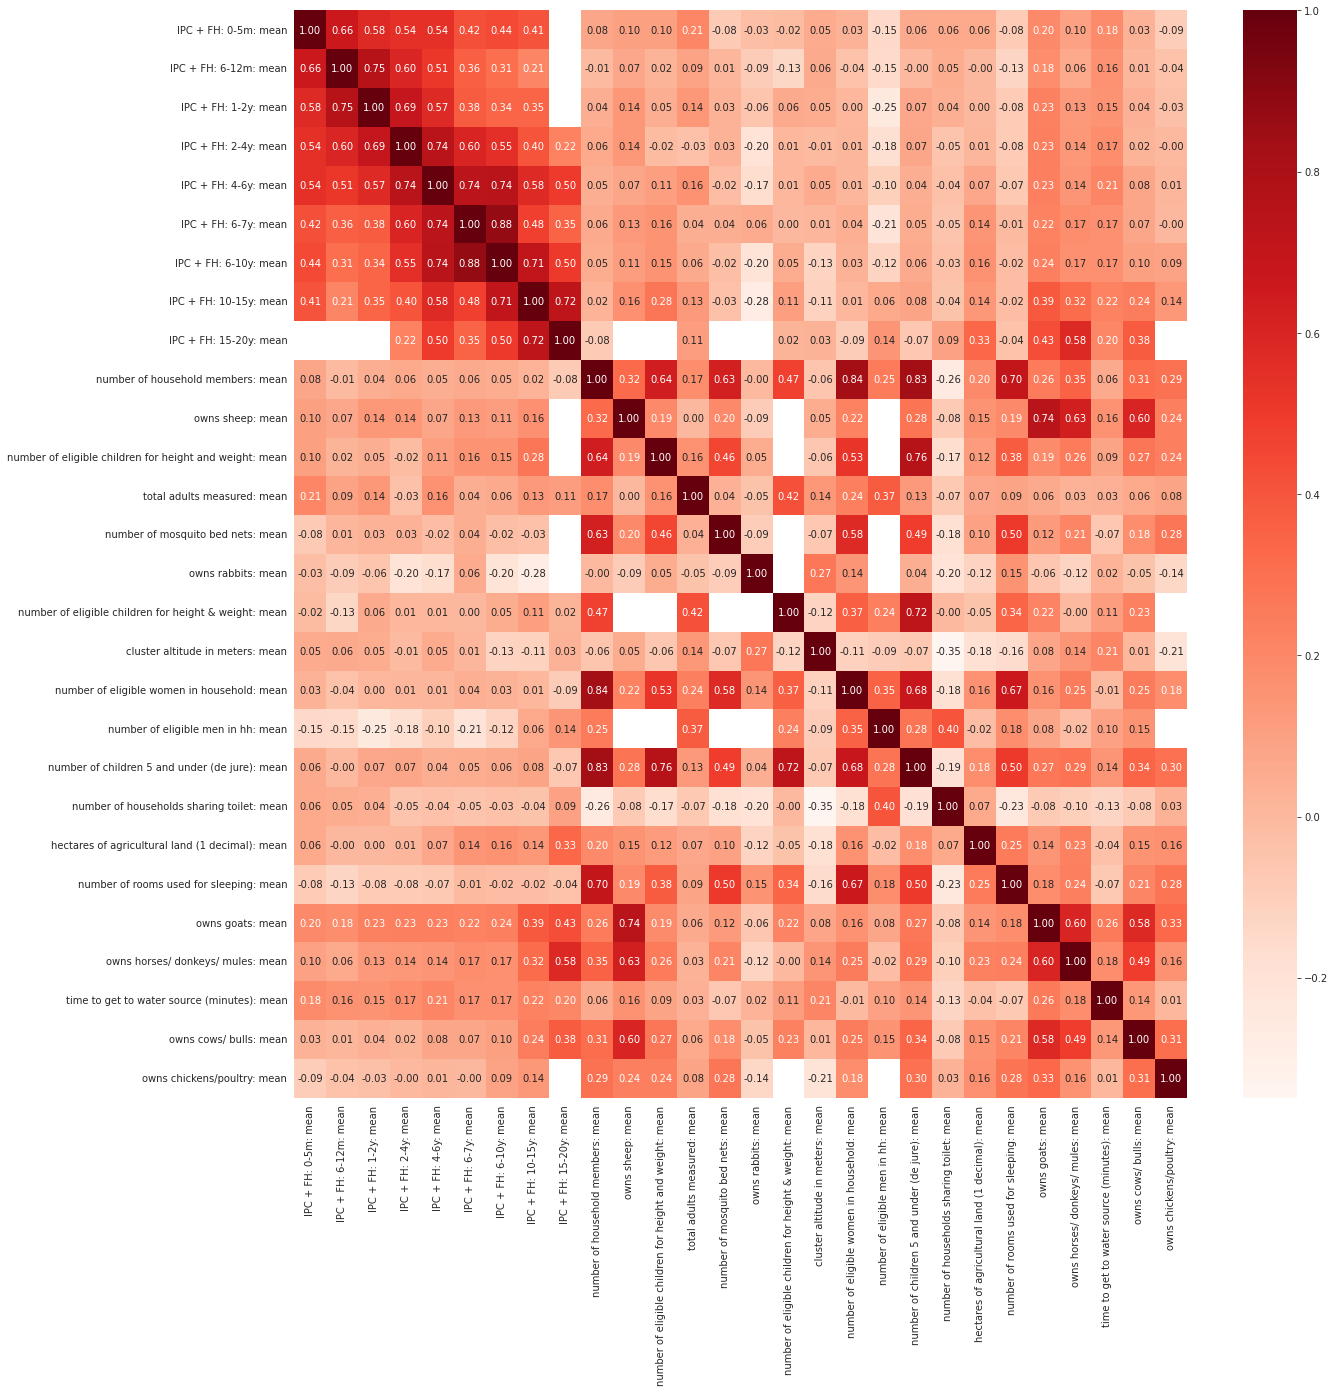

In [8]:
# create a correlation matrix and show it as a heatmap
# numeric_df = numeric_df2
cols = [ 'IPC + FH: 0-5m: mean',
 'IPC + FH: 6-12m: mean',
 'IPC + FH: 1-2y: mean',
 'IPC + FH: 2-4y: mean',
 'IPC + FH: 4-6y: mean',
 'IPC + FH: 6-7y: mean',
 'IPC + FH: 6-10y: mean',
 'IPC + FH: 10-15y: mean',
 'IPC + FH: 15-20y: mean']
numeric_df2 = numeric_df2[cols + [c for c in numeric_df2.columns if c not in cols]]
corr = numeric_df2.corr()
sns.set_style("whitegrid")

# ic(corr)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt=".2f")
#save fig
plt.savefig(f"{input_dir}IPC_correlation_matrix.png")
plt.show()

In [9]:
string_df = pd.read_pickle(string_in_f)
string_df = string_df.copy()
string_df = string_df.fillna(0)
string_df.to_pickle(string_out_f)
# print('hi', string_df.shape)
food_security_df = food_security_df.copy()
# Apply the function for 0 to 6 months back
# for months_start_delta, months_end_delta, m_y_ind in [(0, 5, 'm'), (6, 12, 'm'), (1, 2, 'y'), (2, 4, 'y'), (4, 7, 'y'), (6, 7, 'y'), (6, 10, 'y'), (10, 15, 'y'), (15, 20, 'y'), (20, 25, 'y')]:
#     string_df = string_df.parallel_apply(aggregate_ipc, axis=1, df=food_security_df, months_start_delta=months_start_delta, 
#                                               months_end_delta=months_end_delta, col_suffix=m_y_ind)

In [10]:
# Initialize an empty dictionary to store the column groups
column_groups = {}

# For each column in string_df
for col in string_df.columns:
    if 'household selected' in col or 'language' in col:
        continue
    # Split the column name by ': ' and take all parts except the last one to get the stem
    stem = None
    if ': ' in col:
        stem = ': '.join(col.split(': ')[:-1])
    else:
        ic('no : ', col)
    
    if not stem:
        continue
    # If the stem is not already a key in the dictionary, add it with an empty list as the value
    if stem not in column_groups:
        column_groups[stem] = []
    
    # Append the full column name to the list of columns for this stem
    if not ': NaN' in col:
        column_groups[stem].append(col)

column_groups

ic| 'no : ', col: 'adm2_gaul'
ic| 'no : ', col: 'year'
ic| 'no : ', col: 'month'
ic| 'no : ', col: 'adm1_gaul'
ic| 'no : ', col: 'adm0_gaul'
ic| 'no : ', col: 'GEID_init'
ic| 'no : ', col: 'index'


{'type of place of residence': ['type of place of residence: rural',
  'type of place of residence: urban'],
 'source of drinking water': ['source of drinking water: other',
  'source of drinking water: piped into dwelling',
  'source of drinking water: piped to neighbor',
  'source of drinking water: piped to yard/plot',
  'source of drinking water: protected spring',
  'source of drinking water: protected well',
  'source of drinking water: public tap/standpipe',
  'source of drinking water: rainwater',
  'source of drinking water: river/dam/lake/ponds/stream/canal/irrigation channel',
  'source of drinking water: sachet water',
  'source of drinking water: tube well or borehole',
  'source of drinking water: unprotected spring',
  'source of drinking water: unprotected well',
  'source of drinking water: water seller',
  'source of drinking water: well in residence'],
 'has electricity': ['has electricity: no', 'has electricity: yes'],
 'has radio': ['has radio: no', 'has radio: yes

In [11]:
# Initialize PCA with a maximum of 3 components
# pca = PCA(n_components=3)
pcas = []

# Initialize a DataFrame to store the principal components
pca_df = pd.DataFrame()

# For each categorical column in string_df
for final_n, cols in column_groups.items():    
    # Standardize the one-hot encoded data
    standardized = string_df[cols].to_numpy()
    # drop NaNs
    standardized = standardized[~np.isnan(standardized).any(axis=1)]
    
    # Initialize PCA with a maximum of 3 components
    print(standardized.shape)
    n_components = min(3, standardized.shape[1])
    pca = PCA(n_components=n_components)
    
    # Apply PCA
    principal_components = pca.fit_transform(standardized)
    
    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Find the number of components to keep
    n_components_to_keep = np.argmax(cumulative_explained_variance > 0.8) + 1
    
    # Find the number of components to keep
    if np.any(cumulative_explained_variance > 0.8):
        n_components_to_keep = np.argmax(cumulative_explained_variance > 0.8) + 1
    else:
        n_components_to_keep = min(len(cumulative_explained_variance), 3)
        
    
    # Print the variance explained by the components to keep
    for i in range(n_components_to_keep):
        print(f'Variance explained by {final_n}_PC{i+1}: {pca.explained_variance_ratio_[i]}')
    print(f'Cumulative variance explained by {final_n}_PC1 to PC{n_components_to_keep}: {cumulative_explained_variance[n_components_to_keep-1]}')
    print(len(pca.explained_variance_ratio_),'\n')
 
    # Convert the principal components to a DataFrame
    principal_components_df = pd.DataFrame(data=principal_components[:, :n_components_to_keep], columns=[f'{final_n}_PC{i}' for i in range(1, n_components_to_keep + 1)])

    # Merge the principal components to pca_df
    pca_df = pca_df.merge(principal_components_df, left_index=True, right_index=True, how='outer')
# pca_df = pd.concat(pcas, axis=1)
pca_df


(15252, 2)
Variance explained by type of place of residence_PC1: 1.0
Cumulative variance explained by type of place of residence_PC1 to PC1: 1.0
2 

(15252, 15)
Variance explained by source of drinking water_PC1: 0.24286844247963318
Variance explained by source of drinking water_PC2: 0.20446288694500303
Variance explained by source of drinking water_PC3: 0.14793287836122618
Cumulative variance explained by source of drinking water_PC1 to PC3: 0.5952642077858624
3 

(15252, 2)
Variance explained by has electricity_PC1: 0.9951901737100187
Cumulative variance explained by has electricity_PC1 to PC1: 0.9951901737100187
2 

(15252, 2)
Variance explained by has radio_PC1: 0.8966193567301025
Cumulative variance explained by has radio_PC1 to PC1: 0.8966193567301025
2 

(15252, 2)
Variance explained by has bicycle_PC1: 0.9871707468664094
Cumulative variance explained by has bicycle_PC1 to PC1: 0.9871707468664094
2 

(15252, 2)
Variance explained by has car/truck_PC1: 0.9132619182653793
Cumulati

type of place of residence_PC1  source of drinking water_PC1  \
0                           -0.406491                      0.037082   
1                           -0.406491                     -0.061435   
2                           -0.406491                     -0.037706   
3                           -0.406491                      0.093978   
4                           -0.406491                     -0.042358   
...                               ...                           ...   
15247                       -0.406491                     -0.368662   
15248                       -0.406491                     -0.115982   
15249                       -0.406491                     -0.143120   
15250                       -0.406491                     -0.254414   
15251                        0.524821                     -0.021905   

       source of drinking water_PC2  source of drinking water_PC3  \
0                         -0.110061                     -0.179431   
1                         -0.244285                     -0.328692   
2                         -0.240870                      0.047366   
3                         -0.056180                     -0.139522   
4                         -0.180396                     -0.173518   
...                             ...                           ...   
15247                      0.425566                      0.054844   
15248                     -0.191142                     -0.064218   
15249                     -0.111881                     -0.246654   
15250                      0.155303                     -0.114218   
15251                      0.236388                     -0.037312   

       has electricity_PC1  has radio_PC1  has bicycle_PC1  has car/truck_PC1  \
0                -0.495871       0.064868         0.000012          -0.091812   
1                -0.043323      -0.554932        -0.282824          -0.091812   
2                -0.439302      -0.161371         0.622251          -0.133711   
3                 0.093384      -0.024685        -0.280467          -0.133711   
4                -0.495871       0.428042         0.256053          -0.133711   
...                    ...            ...              ...                ...   
15247            -0.327512       0.328814         0.233015          -0.058891   
15248            -0.477969      -0.005294         0.036530          -0.107192   
15249            -0.495871       0.380147        -0.255380          -0.112968   
15250            -0.115121       0.462962        -0.034799          -0.093423   
15251             0.159496       0.403537        -0.218669          -0.082614   

       region_PC1  region_PC2  ...  has mobile telephone_PC2  \
0       -0.003678   -0.035441  ...                 -0.327866   
1       -0.003671   -0.035378  ...                 -0.181464   
2       -0.003671   -0.035378  ...                 -0.341175   
3       -0.003671   -0.035378  ...                 -0.327311   
4       -0.003671   -0.035378  ...                 -0.341175   
...           ...         ...  ...                       ...   
15247   -0.003665   -0.035315  ...                 -0.044094   
15248   -0.003752   -0.036190  ...                 -0.071621   
15249   -0.003709   -0.035756  ...                 -0.064449   
15250   -0.003683   -0.035495  ...                 -0.098026   
15251   -0.003729   -0.035961  ...                 -0.032791   

       owns land usable for agriculture_PC1  \
0                                 -0.407501   
1                                 -0.407501   
2                                 -0.407501   
3                                 -0.407501   
4                                 -0.407501   
...                                     ...   
15247                              0.360834   
15248                              0.543409   
15249                              0.552595   
15250                              0.115749   
15251                              0.070953   

       owns land u

In [12]:
print((string_df.index == pca_df.index).all())
print((numeric_df.index == pca_df.index).all())
cols =[c for c in numeric_df.columns if 
                          (('IPC:' in c and 'mean' in c) and not 
                           ('6-7y:' in c or '20-25y:' in c))]
# pca_df2 = pca_df[cols]# and not 'IPC + FH' in c]]
print(cols)
pca_df2 = pca_df.merge(numeric_df[cols], left_index=True, right_index=True, how='outer')
pca_df2

True
True
['IPC: 0-5m: mean', 'IPC: 6-12m: mean', 'IPC: 1-2y: mean', 'IPC: 2-4y: mean', 'IPC: 4-6y: mean', 'IPC: 6-10y: mean', 'IPC: 10-15y: mean', 'IPC: 15-20y: mean']


type of place of residence_PC1  source of drinking water_PC1  \
0                           -0.406491                      0.037082   
1                           -0.406491                     -0.061435   
2                           -0.406491                     -0.037706   
3                           -0.406491                      0.093978   
4                           -0.406491                     -0.042358   
...                               ...                           ...   
15247                       -0.406491                     -0.368662   
15248                       -0.406491                     -0.115982   
15249                       -0.406491                     -0.143120   
15250                       -0.406491                     -0.254414   
15251                        0.524821                     -0.021905   

       source of drinking water_PC2  source of drinking water_PC3  \
0                         -0.110061                     -0.179431   
1                         -0.244285                     -0.328692   
2                         -0.240870                      0.047366   
3                         -0.056180                     -0.139522   
4                         -0.180396                     -0.173518   
...                             ...                           ...   
15247                      0.425566                      0.054844   
15248                     -0.191142                     -0.064218   
15249                     -0.111881                     -0.246654   
15250                      0.155303                     -0.114218   
15251                      0.236388                     -0.037312   

       has electricity_PC1  has radio_PC1  has bicycle_PC1  has car/truck_PC1  \
0                -0.495871       0.064868         0.000012          -0.091812   
1                -0.043323      -0.554932        -0.282824          -0.091812   
2                -0.439302      -0.161371         0.622251          -0.133711   
3                 0.093384      -0.024685        -0.280467          -0.133711   
4                -0.495871       0.428042         0.256053          -0.133711   
...                    ...            ...              ...                ...   
15247            -0.327512       0.328814         0.233015          -0.058891   
15248            -0.477969      -0.005294         0.036530          -0.107192   
15249            -0.495871       0.380147        -0.255380          -0.112968   
15250            -0.115121       0.462962        -0.034799          -0.093423   
15251             0.159496       0.403537        -0.218669          -0.082614   

       region_PC1  region_PC2  ...  owns livestock, herds or farm animals_PC1  \
0       -0.003678   -0.035441  ...                                  -0.445135   
1       -0.003671   -0.035378  ...                                  -0.445135   
2       -0.003671   -0.035378  ...                                  -0.445135   
3       -0.003671   -0.035378  ...                                  -0.445135   
4       -0.003671   -0.035378  ...                                  -0.445135   
...           ...         ...  ...                                        ...   
15247   -0.003665   -0.035315  ...                                   0.386345   
15248   -0.003752   -0.036190  ...                                   0.414171   
15249   -0.003709   -0.035756  ...                                   0.473745   
15250   -0.003683   -0.035495  ...                                   0.262956   
15251   -0.003729   -0.035961  ...                                   0.268640   

       owns livestock, herds or farm animals_PC2  IPC: 0-5m: mean  \
0                                      -0.207917              NaN   
1                                      -0.207917              NaN   
2                                      -0.207917              NaN   
3                                      -0.207917              NaN   
4                                 

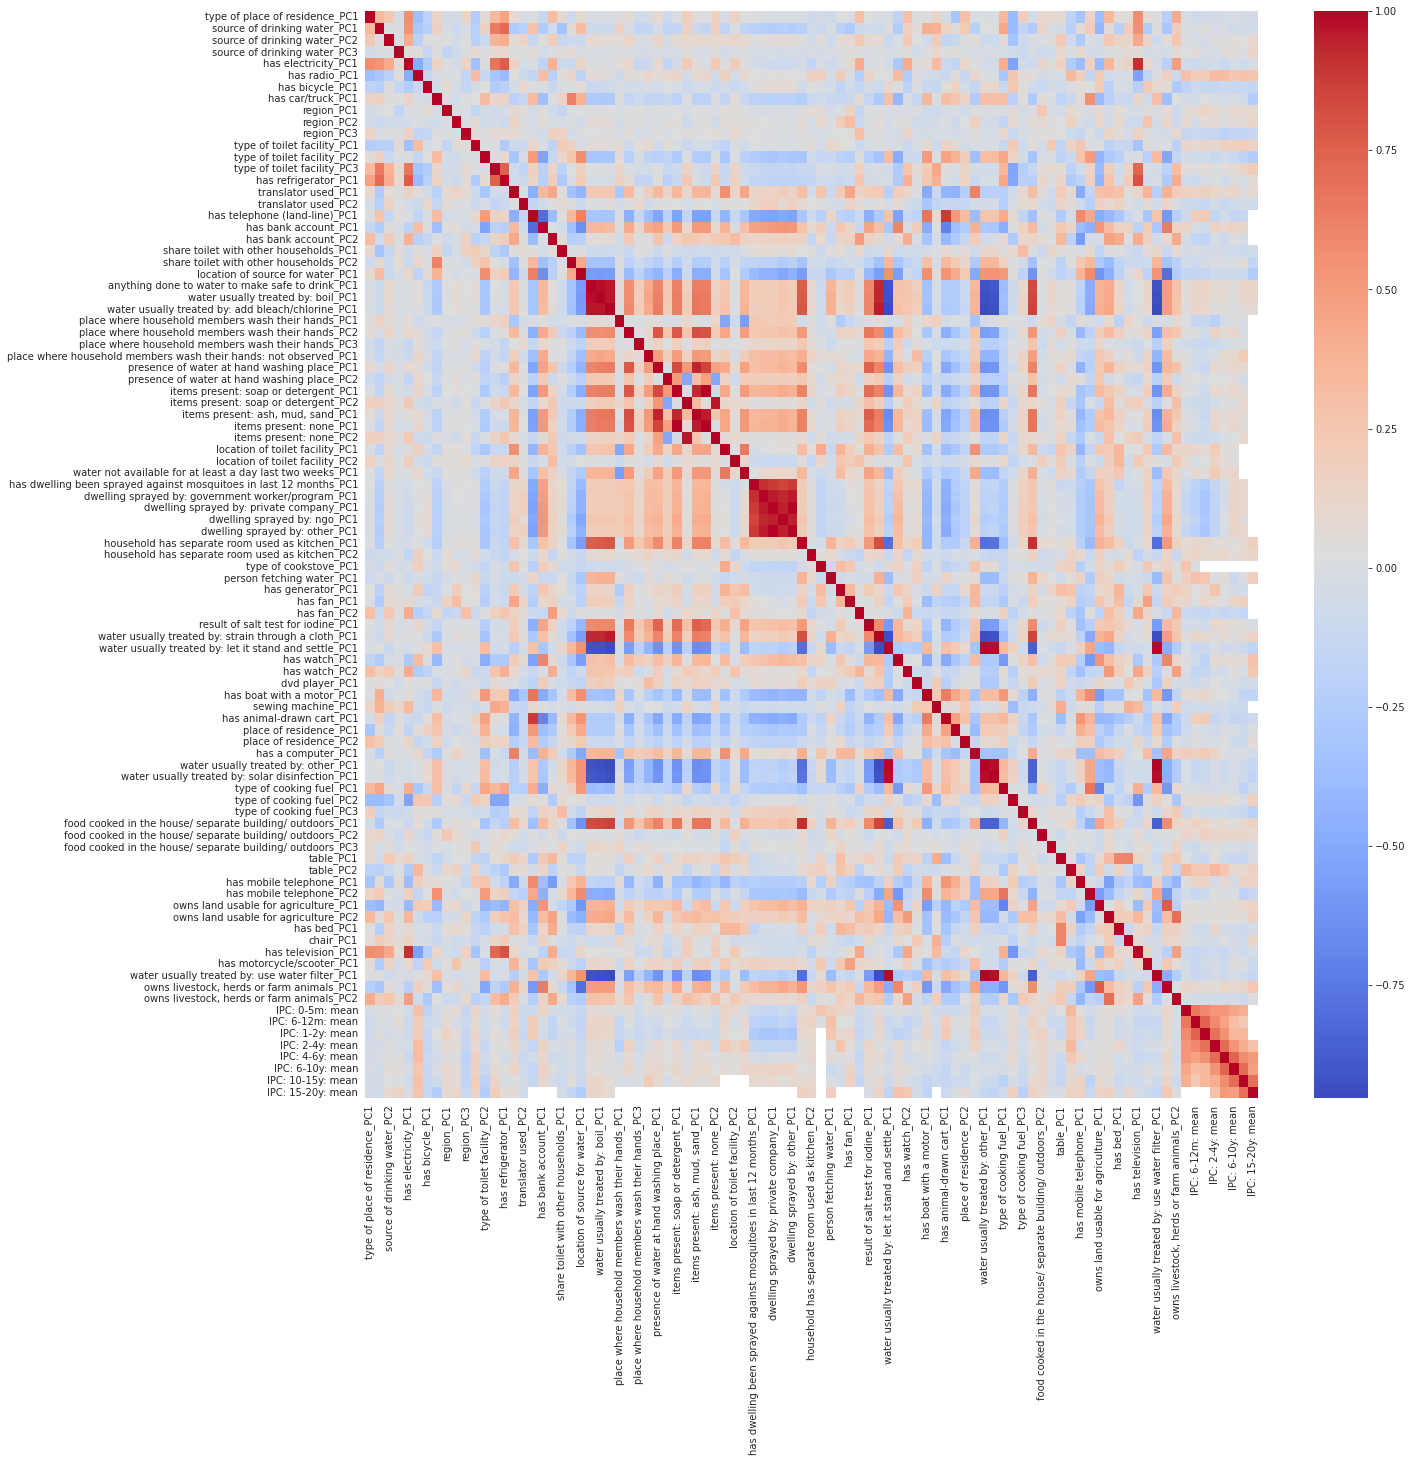

In [13]:
# create a correlation matrix and show it as a heatmap
pca_df = pca_df2
corr = pca_df.corr()
sns.set_style("whitegrid")

# ic(corr)
plt.figure(figsize=(20, 20))
# sns.heatmap(corr, annot=False, cmap=plt.cm.Reds, fmt=".2f")
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
#save fig
plt.savefig(f"{input_dir}IPC_correlation_matrix_PCA_single_cols.png")
plt.show()

In [14]:
pca_df.to_pickle(f"{input_dir}grouped_df_V3_{dataset_type}_string_numeric_PCA.pkl")

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
numeric_df2_scaled = scaler.fit_transform(numeric_df2)

# Convert the result back to a DataFrame
numeric_df2_scaled = pd.DataFrame(numeric_df2_scaled, columns=numeric_df2.columns)
# combined_df = numeric_df2.merge(string_df[[c for c in string_df.columns if not 'IPC: ' in c 
#                                           and not 'IPC + FA' in c and not '_gaul' in c and c != 'GEID_init' and c != 'year' and c != 'month']], left_index=True, right_index=True, how='outer')
combined_df = string_df.merge(numeric_df2_scaled, left_index=True, right_index=True, how='outer')
# combined_df.drop(columns=['year of interview_median', 'month of interview_median'] + [c for c in combined_df.columns if 'region: ' in c], inplace=True)
combined_df.to_pickle(f"{input_dir}grouped_df_V3_{dataset_type}_string_numeric_combined.pkl")
combined_df


adm2_gaul  year  month           adm1_gaul adm0_gaul  \
0                      Ambaca  2007      3        Kuanza Norte    Angola   
1                      Amboim  2006     12          Cuanza Sul    Angola   
2                      Andulo  2007      1                 Bie    Angola   
3                  Baia Farta  2006     11            Benguela    Angola   
4                     Balombo  2006     12            Benguela    Angola   
...                       ...   ...    ...                 ...       ...   
15247              Umzingwane  2015      7  Matabeleland South  Zimbabwe   
15248  Uzumba-Maramba-Pfungwe  2015     10    Mashonaland East  Zimbabwe   
15249                    Zaka  2015     10            Masvingo  Zimbabwe   
15250                  Zvimba  2015     11    Mashonaland West  Zimbabwe   
15251              Zvishavane  2015      7            Midlands  Zimbabwe   

      GEID_init  index  type of place of residence: rural  \
0      AOGE52FL      0                           1.000000   
1      AOGE52FL      1                           1.000000   
2      AOGE52FL      2                           1.000000   
3      AOGE52FL      3                           1.000000   
4      AOGE52FL      4                           1.000000   
...         ...    ...                                ...   
15247  ZWGE72FL  15247                           1.000000   
15248  ZWGE72FL  15248                           1.000000   
15249  ZWGE72FL  15249                           1.000000   
15250  ZWGE72FL  15250                           1.000000   
15251  ZWGE72FL  15251                           0.341463   

       type of place of residence: urban  source of drinking water: other  \
0                               0.000000                              0.0   
1                               0.000000                              0.0   
2                               0.000000                              0.0   
3                               0.000000                              0.0   
4                               0.000000                              0.0   
...                                  ...                              ...   
15247                           0.000000                              0.0   
15248                           0.000000                              0.0   
15249                           0.000000                              0.0   
15250                           0.000000                              0.0   
15251                           0.658537                              0.0   

       ...  number of eligible men in hh: mean  \
0      ...                                 NaN   
1      ...                                 NaN   
2      ...                                 NaN   
3      ...                                 NaN   
4      ...                                 NaN   
...    ...                                 ...   
15247  ...                                 NaN   
15248  ...                                 NaN   
15249  ...                                 NaN   
15250  ...                                 NaN   
15251  ...                                 NaN   

       number of children 5 and under (de jure): mean  \
0                                            1.397541   
1                                            0.941893   
2                                           -0.789571   
3                                            0.220449   
4                                            0.510226   
...                                               ...   
15247                                       -0.566087   
15248                                       -0.430820   
15249                                       -0.240087   
15250                                       -0.284853   
15251                                       -0.997392   

       number of households sharing toilet: mean  \
0                                            NaN   
1                                            NaN   
2      

In [16]:
# Calculate the number of non-null entries in each column
nonnull_counts = combined_df.count()

# Sort the columns by non-null count in descending order
sorted_columns = nonnull_counts.sort_values(ascending=False).index

# Reindex the DataFrame with the new column order
combined_df = combined_df[sorted_columns]
seen = set()
for col in combined_df.columns:
    if ': ' in col:
        base = col.rsplit(': ', 1)[0]
        if base not in seen:
            # print(base)
            seen.add(base)
    else:
        # print('caution: ', col)
        seen.add(col)


pca_food = ['has refrigerator', 'type of cooking fuel', 'food cooked in the house/ separate building/ outdoors', 
            'household has separate room used as kitchen', 'type of cookstove', 'result of salt test for iodine']
pca_general_info = ['type of place of residence', 'cluster altitude in meters', 'number of rooms used for sleeping', 'place of residence', 'amount of households']
pca_water = ['source of drinking water', 'time to get to water source (minutes)', 'location of source for water', 'anything done to water to make safe to drink', 
              'water not available for at least a day last two weeks', 'person fetching water']
pca_water_treatment = ['water usually treated by: add bleach/chlorine', 'water usually treated by: boil', 'water usually treated by: let it stand and settle', 
                       'water usually treated by: strain through a cloth', 'water usually treated by: use water filter', 'water usually treated by: solar disinfection', 
                       'water usually treated by: other']
pca_elecricity = ['has electricity', 'has generator']
pca_transportation = ['has bicycle', 'has car/truck', 'has boat with a motor', 'has animal-drawn cart', 'has motorcycle/scooter', ]
pca_sanitation =['type of toilet facility', 'share toilet with other households', 'number of households sharing toilet', 'place where household members wash their hands', 
                 'presence of water at hand washing place', 'location of toilet facility']
pca_communication = ['has telephone (land-line)', 'has radio', 'has a computer', 'has mobile telephone', 'has television', 'dvd player']
pca_demographics = ['number of eligible children for height and weight', 'total adults measured', 'number of eligible women in household', 
                    'number of eligible men in hh', 'number of children 5 and under (de jure)', 'number of household members']
pca_malaria = ['number of mosquito bed nets', 'has dwelling been sprayed against mosquitoes in last 12 months']
pca_agriculture = ['owns rabbits', 'hectares of agricultural land (1 decimal)', 'owns goats', 'owns horses/ donkeys/ mules','owns cows/ bulls', 'owns chickens/poultry', 'sewing machine',
                   'owns land usable for agriculture', 'owns sheep', 'owns livestock, herds or farm animals']

pca_housing = ['table', 'has bed', 'chair', 'has watch', 'has fan', 'has bank account']
pca_cleaning_utensiles = ['items present: soap or detergent', 'items present: ash, mud, sand', 'items present: none']
dwelling_sprayed_malaria = ['dwelling sprayed by: government worker/program', 'dwelling sprayed by: private company', 'dwelling sprayed by: ngo', 'dwelling sprayed by: other']
# pca_infrastructure = pca_water + pca_elecricity + pca_transportation + pca_sanitation + pca_communication
pca_dfs_l = []
for nr in range(1, 10):
    # Initialize a DataFrame to store the principal components
    pca_df = pd.DataFrame()
    for pca_l, final_n in [(pca_food, 'food utensiles'), (pca_general_info, 'general info'), (pca_water, 'water infrastructure'), (pca_water_treatment, 'water treatment'), 
                (pca_elecricity, 'electricity'), (pca_transportation, 'transportation'), (pca_sanitation, 'sanitation'), (pca_communication, 'communication'), 
                (pca_demographics, 'demographics'), (pca_malaria, 'malaria'), (pca_agriculture, 'agriculture'), 
                (pca_housing, 'housing'), (pca_cleaning_utensiles, 'cleaning utensiles'), (dwelling_sprayed_malaria, 'dwelling sprayed malaria')]:
            
        final_cols = []
        # Catch correct columns
        for col in pca_l[:nr]:    
            print('col', col)
            subset = [c for c in combined_df.columns if col in c]
            final_col = col + ': ' + 'mean'
            if final_col in subset:
                print('numeric', final_col)
                final_cols.append(final_col)
            else:
                subset = [c for c in subset if c[-3:] != 'NaN']
                print('str', subset)
                final_cols.extend(subset)
        final_cols = list(set(final_cols))
        print('final', final_cols)    
        
        # Select the subset of columns you're interested in
        subset_df = combined_df[final_cols]

        # Drop rows with NaNs from this subset
        subset_df = subset_df.dropna()

        # Capture the valid indices after dropping NaNs
        valid_index = subset_df.index
        print('vi', valid_index)
        # Now, you can use `subset_df` for PCA or further processing

        standardized = subset_df.to_numpy()
        print(standardized.shape)
        # drop NaNs
        standardized = standardized[~np.isnan(standardized).any(axis=1)]
        
        # Assuming standardized DataFrame has been created and NaNs have been dropped

        # Initialize PCA with a maximum of 3 components
        print(standardized.shape)
        n_components = min(6, standardized.shape[1])
        pca = PCA(n_components=n_components)
        
        # Apply PCA
        principal_components = pca.fit_transform(standardized)

    
        # Calculate the cumulative explained variance
        cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
        
        # Find the number of components to keep
        n_components_to_keep = np.argmax(cumulative_explained_variance > 0.8) + 1
        
        # Find the number of components to keep
        if np.any(cumulative_explained_variance > 0.8):
            n_components_to_keep = np.argmax(cumulative_explained_variance > 0.8) + 1
        else:
            n_components_to_keep = min(len(cumulative_explained_variance), 6)
            
        
        # Print the variance explained by the components to keep
        # for i in range(n_components_to_keep):
        #     print(f'Variance explained by {final_n}_PC{i+1}: {pca.explained_variance_ratio_[i]}')
        # print(f'Cumulative variance explained by {final_n}_PC1 to PC{n_components_to_keep}: {cumulative_explained_variance[n_components_to_keep-1]}')
        # print(len(pca.explained_variance_ratio_), n_components_to_keep)

        # Convert the principal components to a DataFrame
        principal_components_df = pd.DataFrame(data=principal_components[:, :n_components_to_keep], 
                                        columns=[f'{final_n}_PC{i}' for i in range(1, n_components_to_keep + 1)],
                                        index=valid_index)  # Use the valid indices here

        # principal_components_df = pd.DataFrame(data=principal_components[:, :n_components_to_keep], columns=[f'{final_n}_PC{i}' for i in range(1, n_components_to_keep + 1)])
        # Assuming 'IPC' is the column name for the IPC values in combined_df
        # pca_df = pca_df.merge(combined_df[['IPC']], left_index=True, right_index=True, how='outer')
        print(principal_components_df.shape)
        print('comp', principal_components_df.head(50))
        # print('cols', principal_components_df.columns.to_list())
        # corr = principal_components_df.corr()
        # Merge the principal components to pca_df
        print('pca ind', pca_df.index)
        print('comp ind', principal_components_df.index, '\n')
        # Now, when you merge, the indices should match up correctly
        pca_df = pca_df.merge(principal_components_df, left_index=True, right_index=True, how='outer')
    # pca_df = pd.concat(pcas, axis=1)
    # Assuming 'IPC' is the column name for the IPC values in combined_df
    pca_df = pca_df.merge(combined_df[[c for c in combined_df if 'IPC' in c]], left_index=True, right_index=True, how='outer')
    sorted_cols = ['IPC + FH: 0-5m: mean',
                   'IPC + FH: 6-12m: mean',
                'IPC + FH: 1-2y: mean',
                'IPC + FH: 2-4y: mean',
                'IPC + FH: 4-6y: mean',
                'IPC + FH: 6-10y: mean',
                'IPC + FH: 10-15y: mean',
                'IPC + FH: 15-20y: mean']
    pca_df = pca_df[sorted_cols + [c for c in pca_df.columns if c not in sorted_cols]]
    pca_dfs_l.append(pca_df)


col has refrigerator
str ['has refrigerator: yes', 'has refrigerator: no']
final ['has refrigerator: no', 'has refrigerator: yes']
vi RangeIndex(start=0, stop=15252, step=1)
(15252, 2)
(15252, 2)
(15252, 1)
comp     food utensiles_PC1
0            -0.249835
1            -0.023790
2            -0.249835
3            -0.249835
4            -0.249835
5            -0.136812
6             0.841861
7            -0.249835
8             0.315278
9             0.548694
10           -0.029087
11           -0.249835
12           -0.199378
13           -0.249835
14           -0.148922
15           -0.179196
16           -0.249835
17           -0.249835
18            0.145744
19           -0.249835
20           -0.249835
21           -0.249835
22           -0.249835
23           -0.249835
24           -0.037917
25           -0.249835
26            0.345021
27           -0.249835
28           -0.249835
29           -0.249835
30           -0.249835
31           -0.249835
32           -0.249835
33    

(13519, 4)
comp      water infrastructure_PC1  water infrastructure_PC2  \
139                  4.420402                 -0.612119   
140                  0.372550                 -0.556664   
141                  0.202058                 -0.540901   
142                  0.436113                 -0.401211   
143                 -0.023545                 -0.544943   
144                 -0.435357                 -0.450532   
145                  0.688568                 -0.488979   
146                 -0.438667                 -0.252384   
147                 -0.633832                 -0.374625   
148                 -0.137756                 -0.481281   
149                  0.844057                 -0.568559   
150                 -0.826679                 -0.381709   
151                  0.500266                 -0.559286   
152                 -0.098479                 -0.584133   
153                  0.065837                 -0.593196   
154                 -0.596682           

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

In [ ]:
print(len(pca_df.columns.tolist()))
pca_df.columns.tolist()

55


['IPC + FH: 0-5m: mean',
 'IPC + FH: 6-12m: mean',
 'IPC + FH: 1-2y: mean',
 'IPC + FH: 2-4y: mean',
 'IPC + FH: 4-6y: mean',
 'IPC + FH: 6-10y: mean',
 'IPC + FH: 10-15y: mean',
 'IPC + FH: 15-20y: mean',
 'food utensiles_PC1',
 'food utensiles_PC2',
 'food utensiles_PC3',
 'food utensiles_PC4',
 'food utensiles_PC5',
 'food utensiles_PC6',
 'general info_PC1',
 'general info_PC2',
 'water infrastructure_PC1',
 'water infrastructure_PC2',
 'water infrastructure_PC3',
 'water infrastructure_PC4',
 'water infrastructure_PC5',
 'water treatment_PC1',
 'electricity_PC1',
 'electricity_PC2',
 'transportation_PC1',
 'transportation_PC2',
 'transportation_PC3',
 'sanitation_PC1',
 'sanitation_PC2',
 'sanitation_PC3',
 'sanitation_PC4',
 'sanitation_PC5',
 'sanitation_PC6',
 'communication_PC1',
 'communication_PC2',
 'communication_PC3',
 'communication_PC4',
 'demographics_PC1',
 'demographics_PC2',
 'demographics_PC3',
 'malaria_PC1',
 'malaria_PC2',
 'agriculture_PC1',
 'agriculture_PC2',

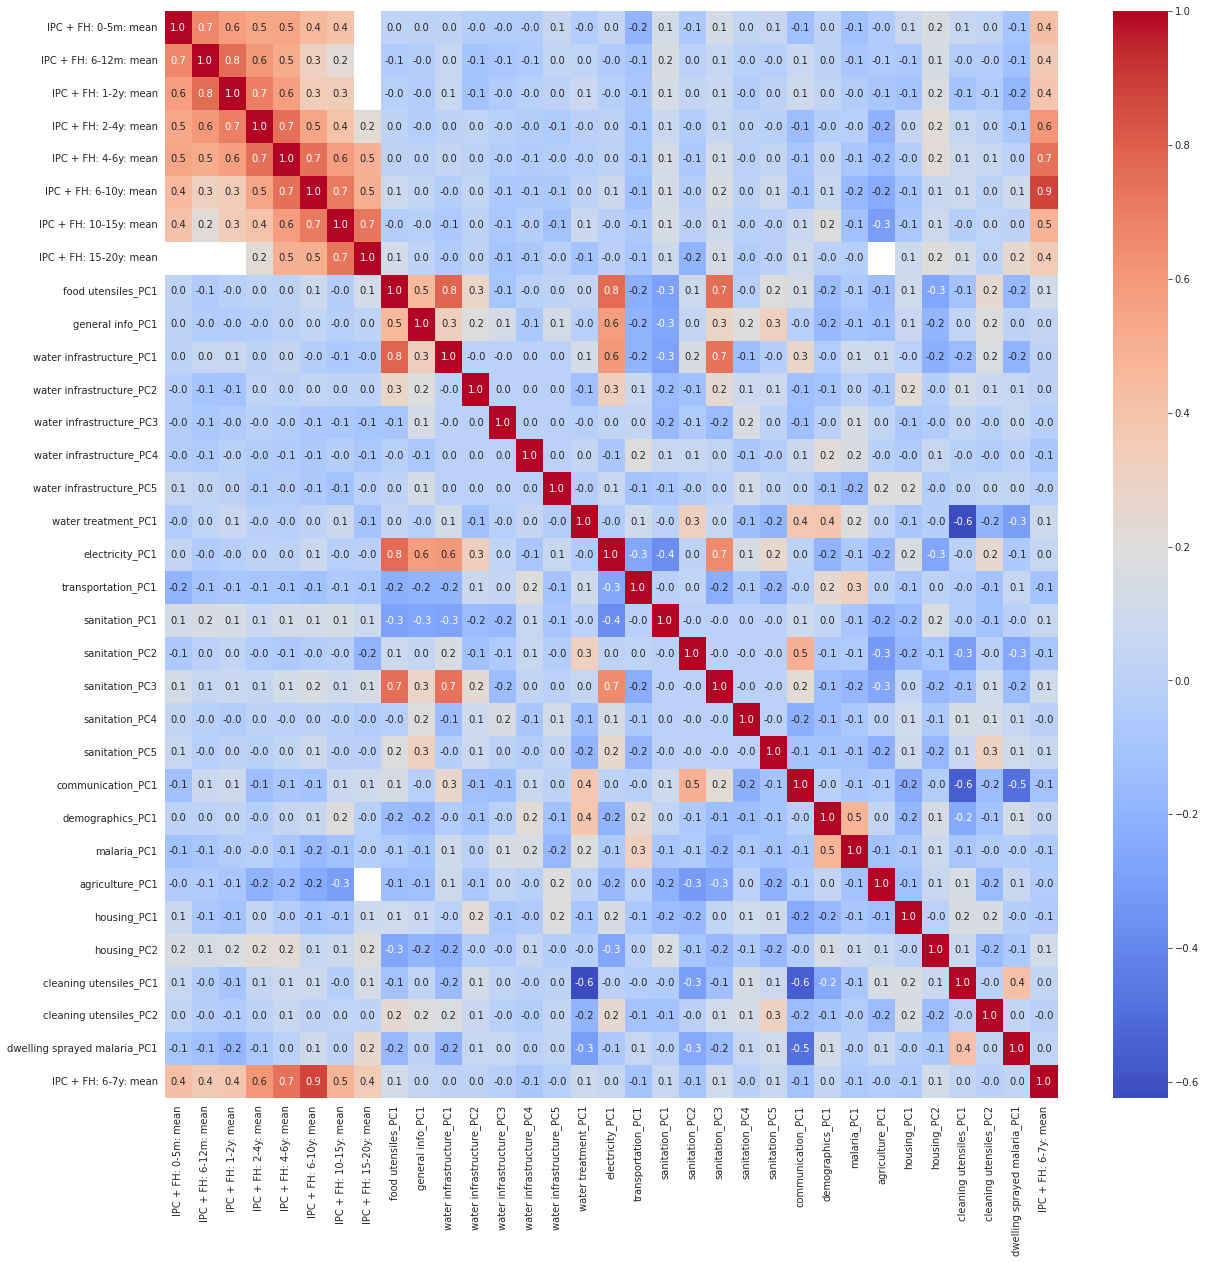

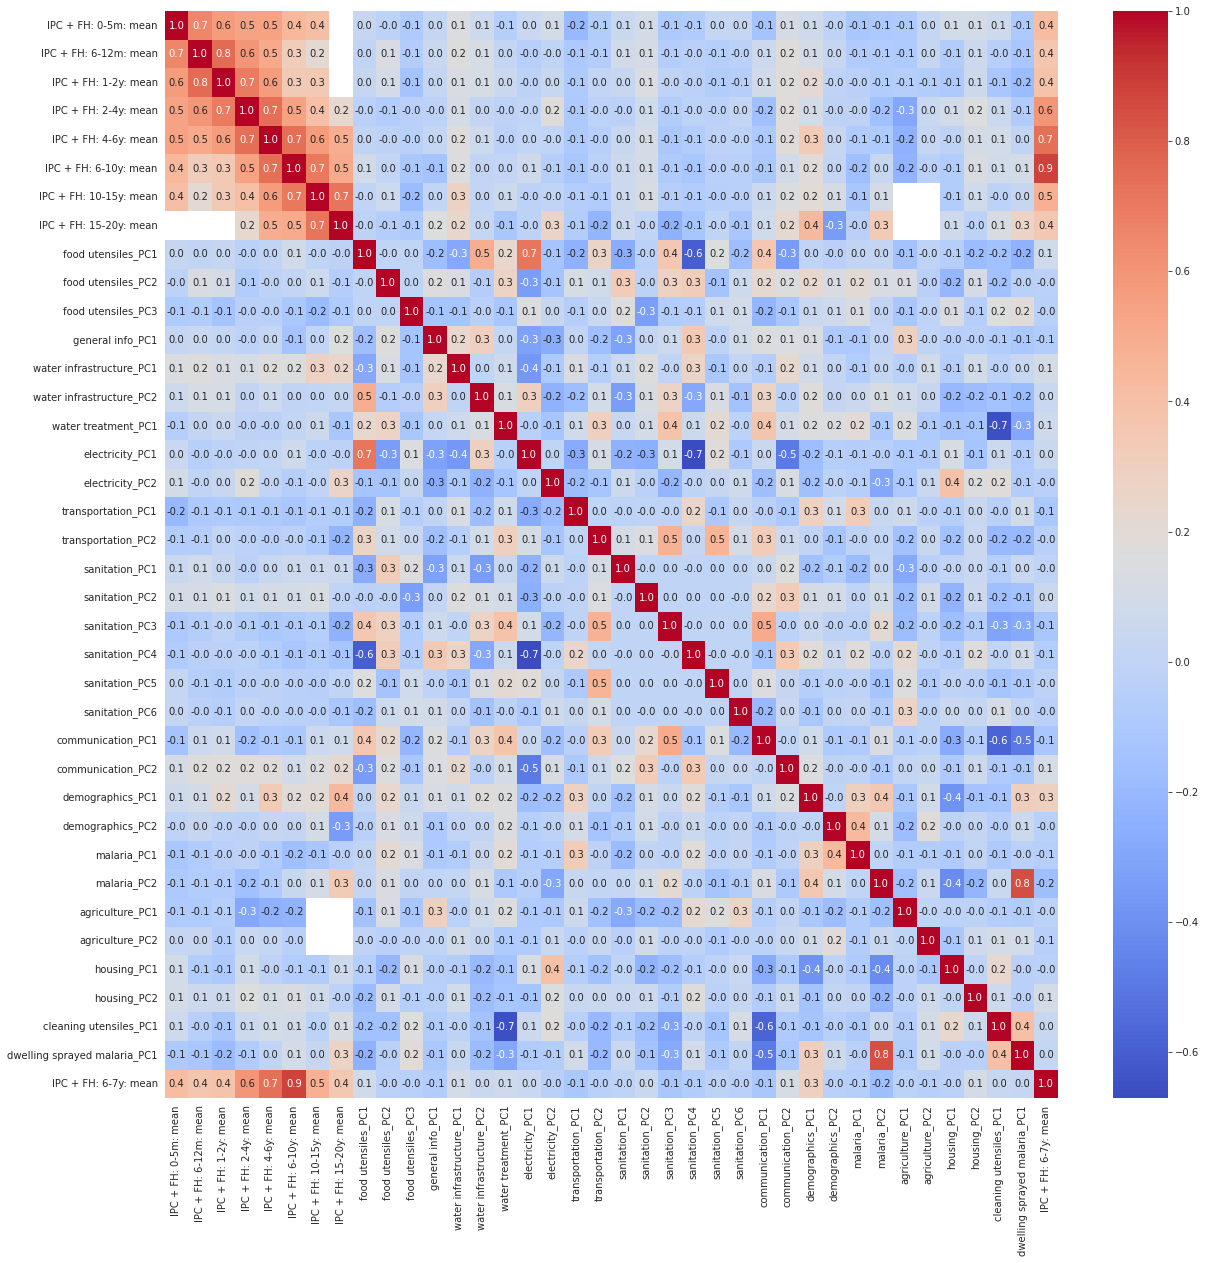

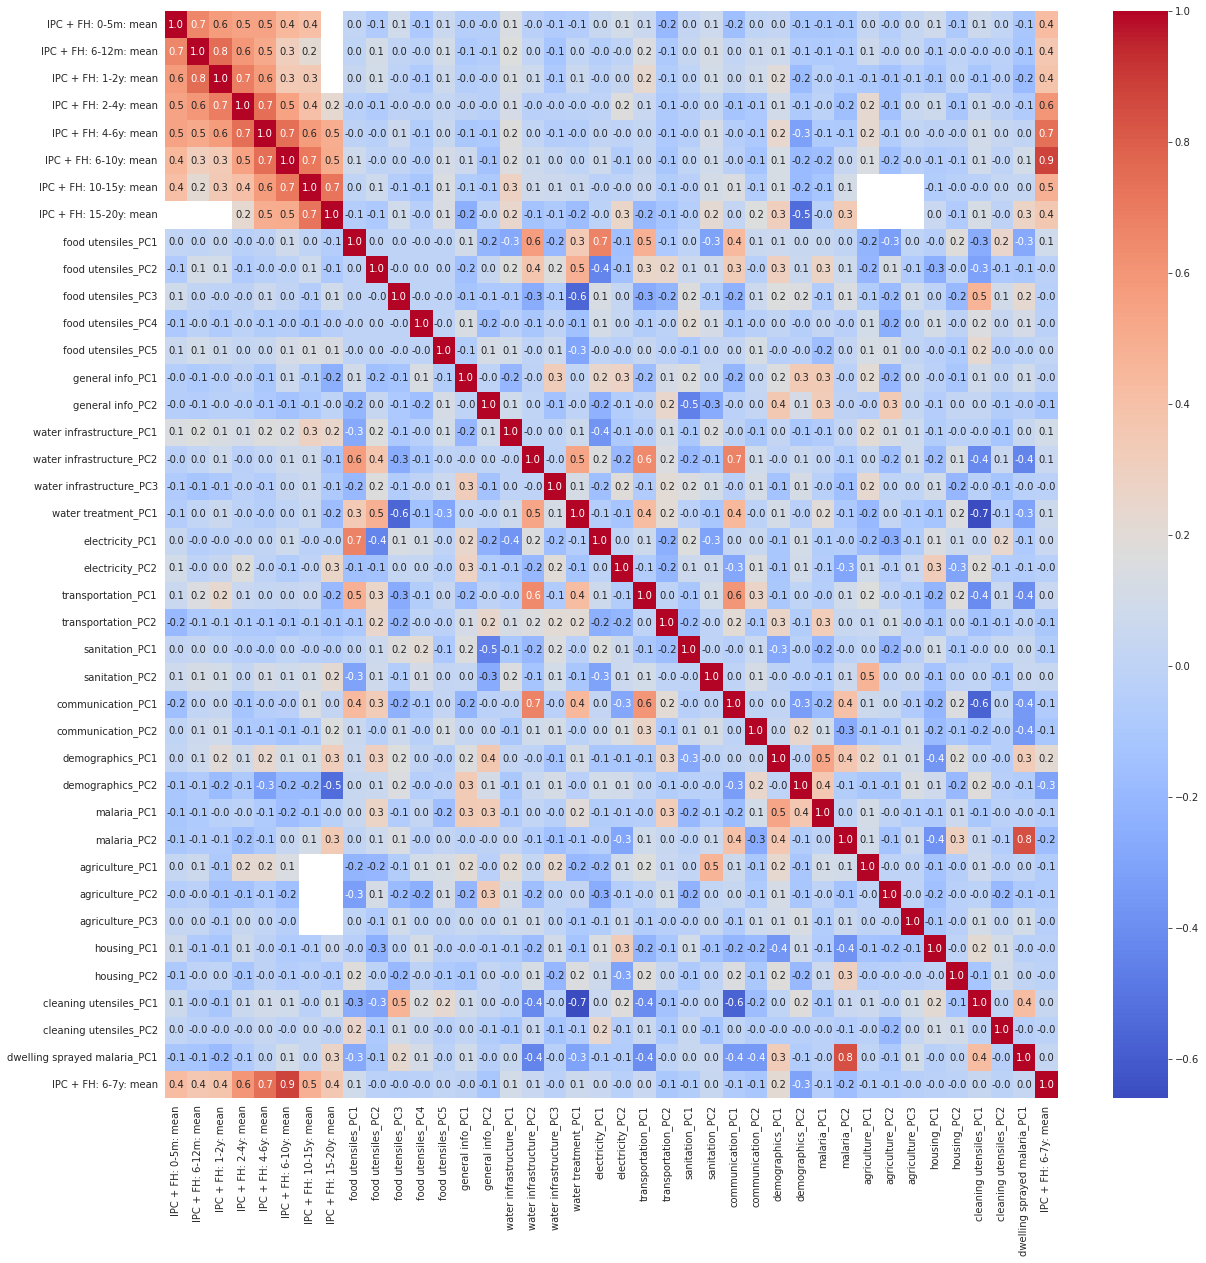

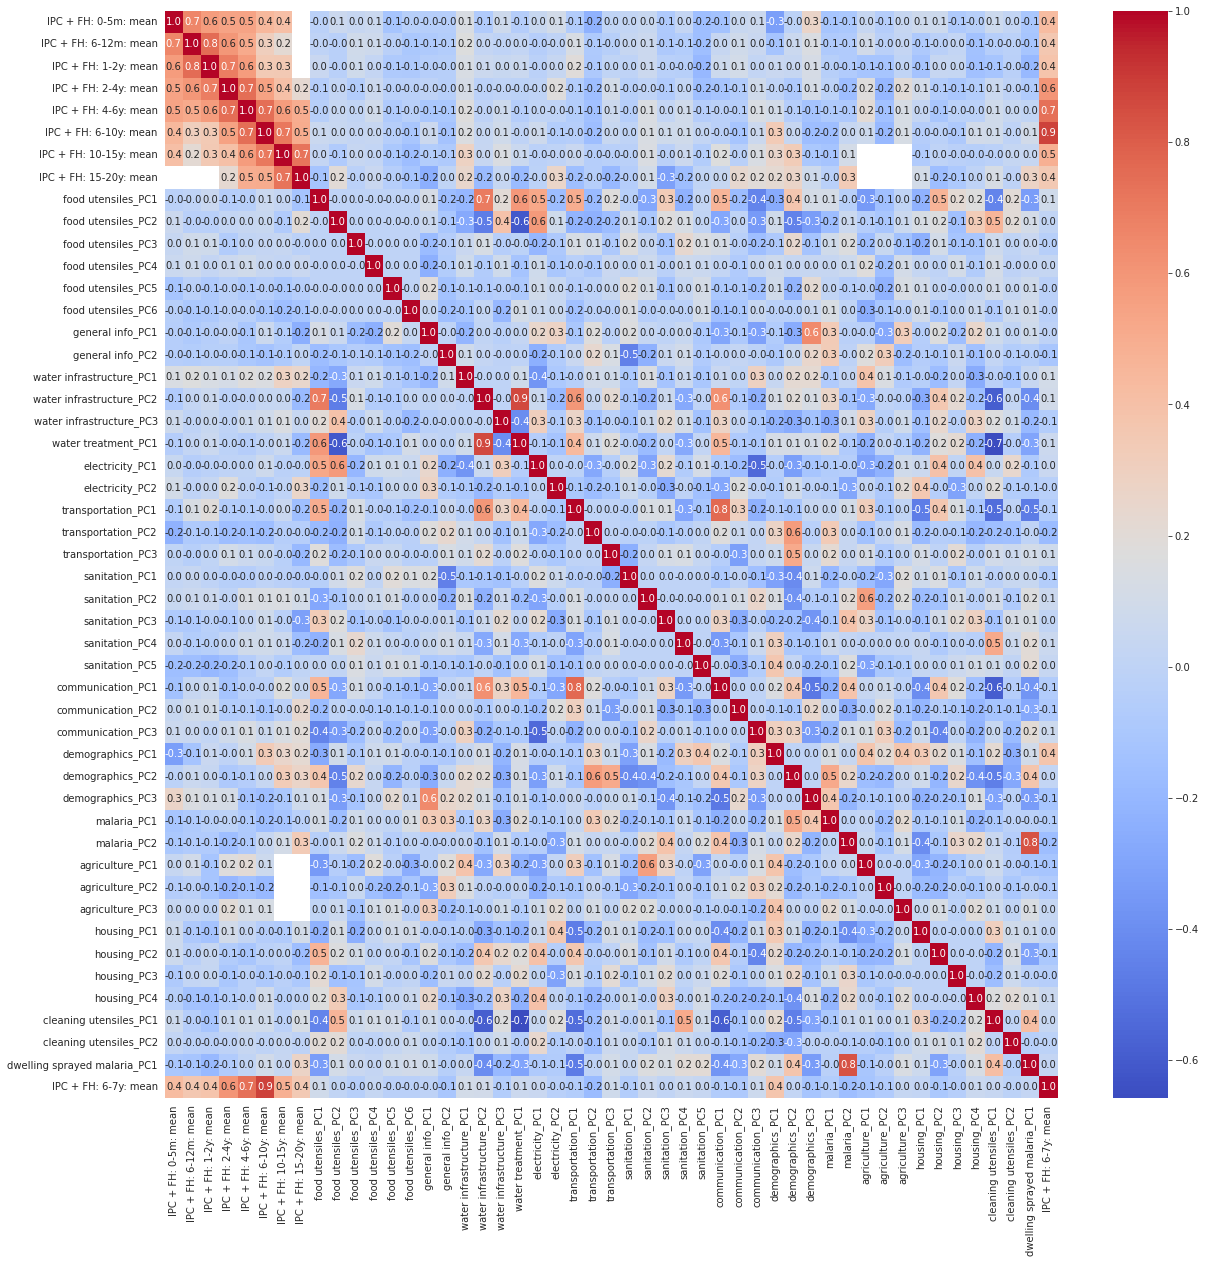

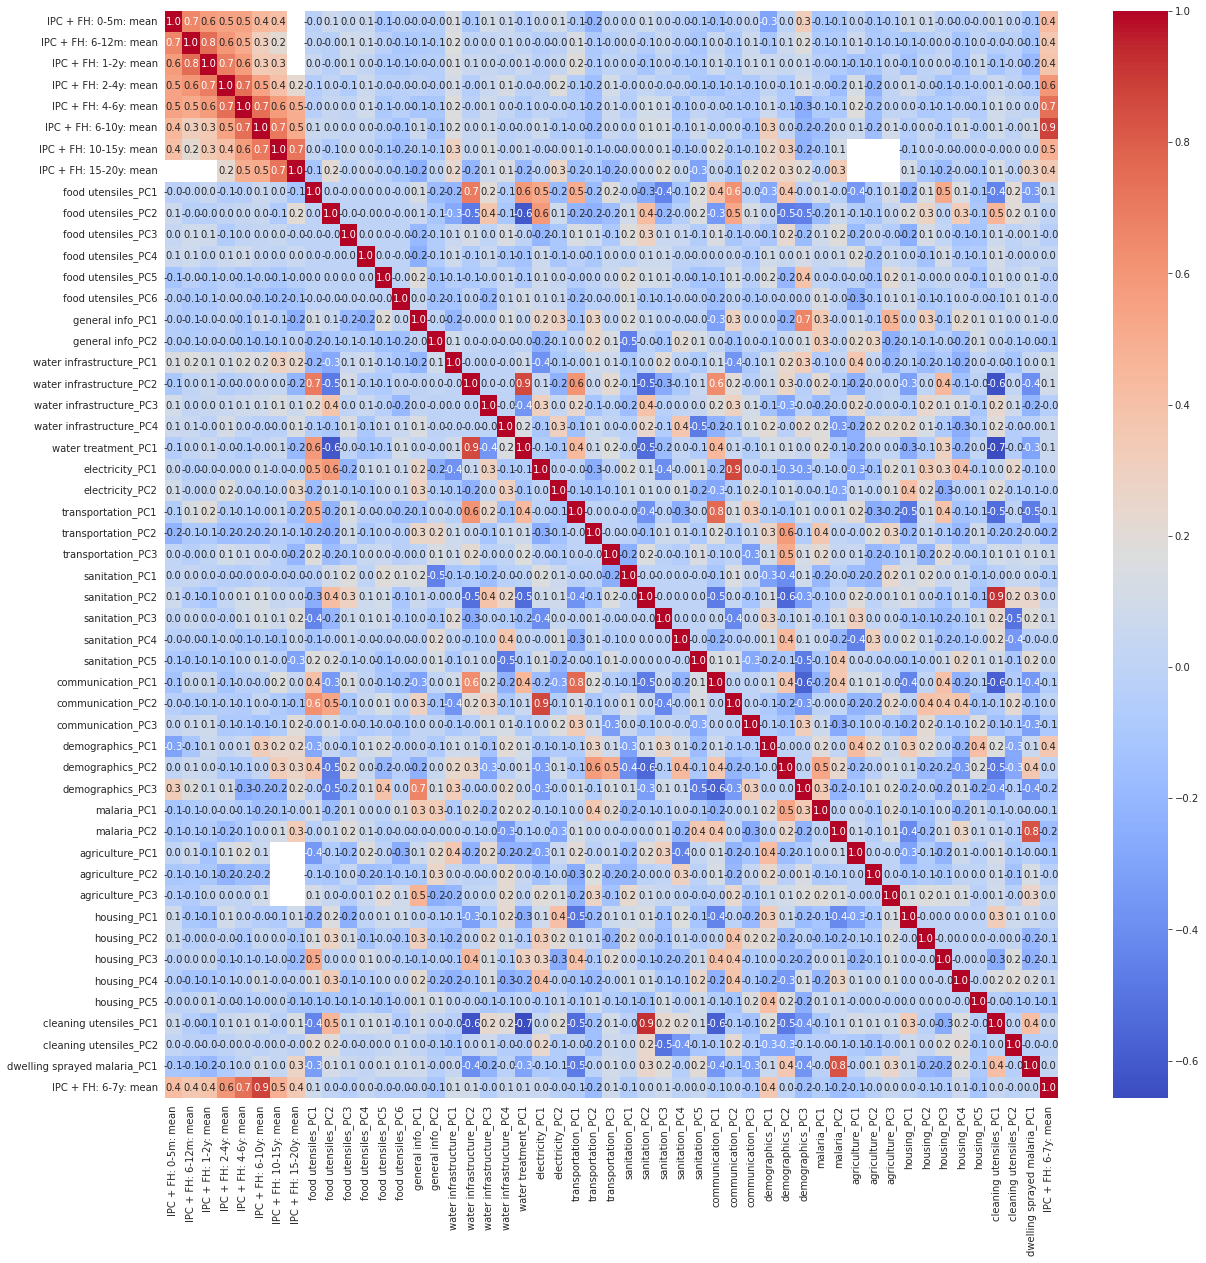

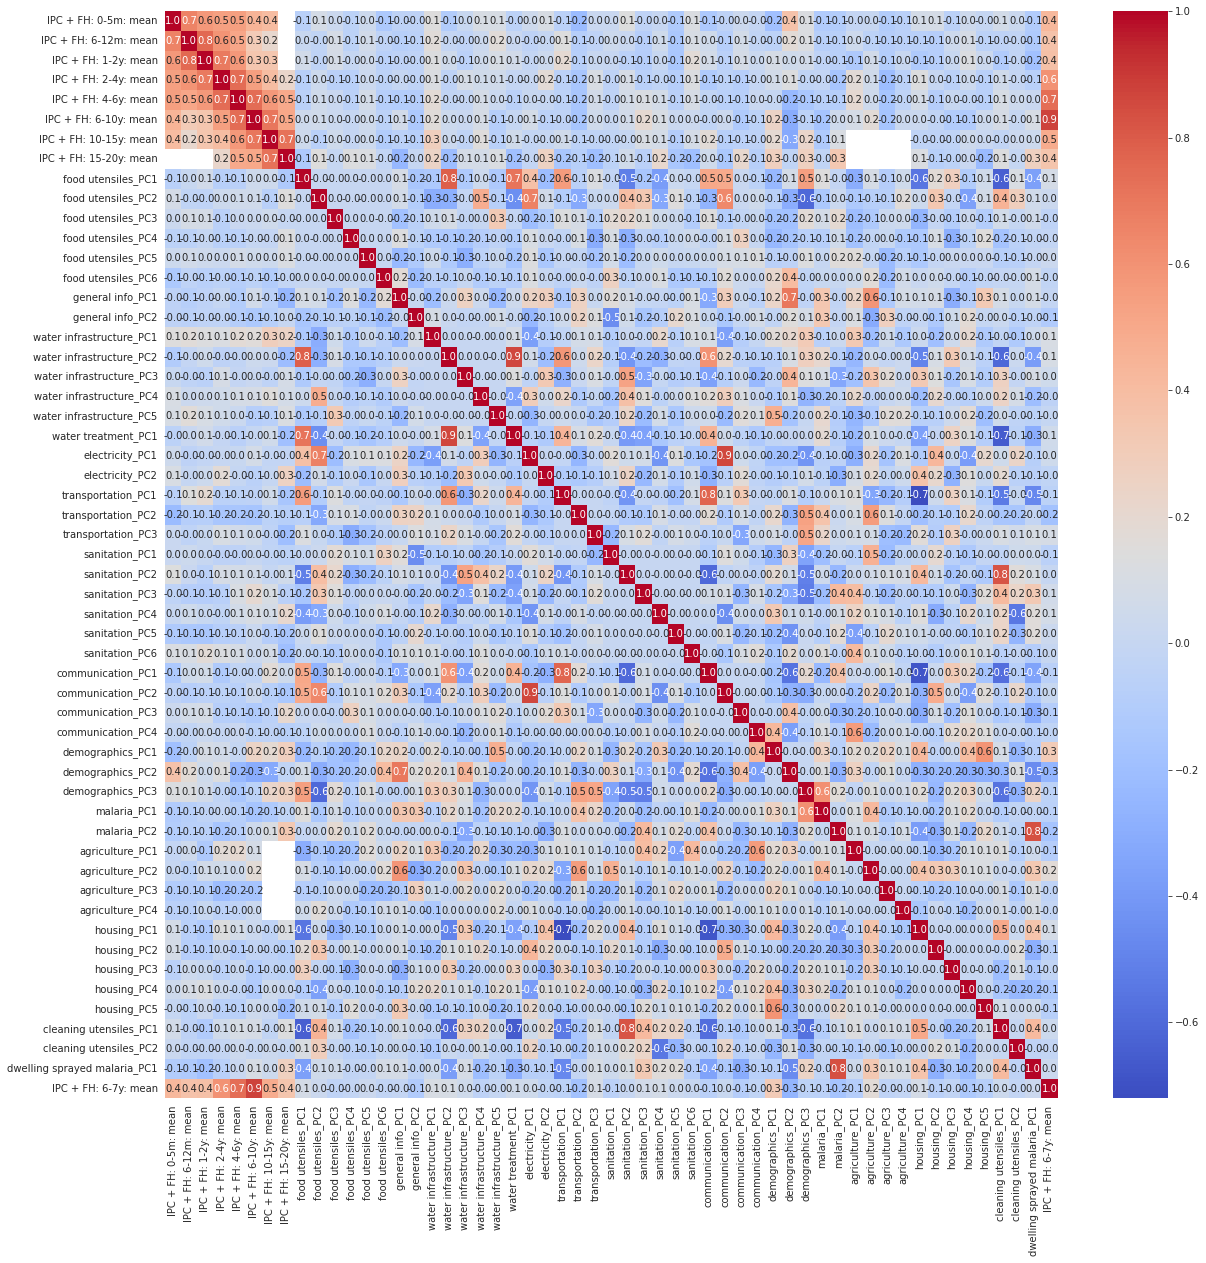

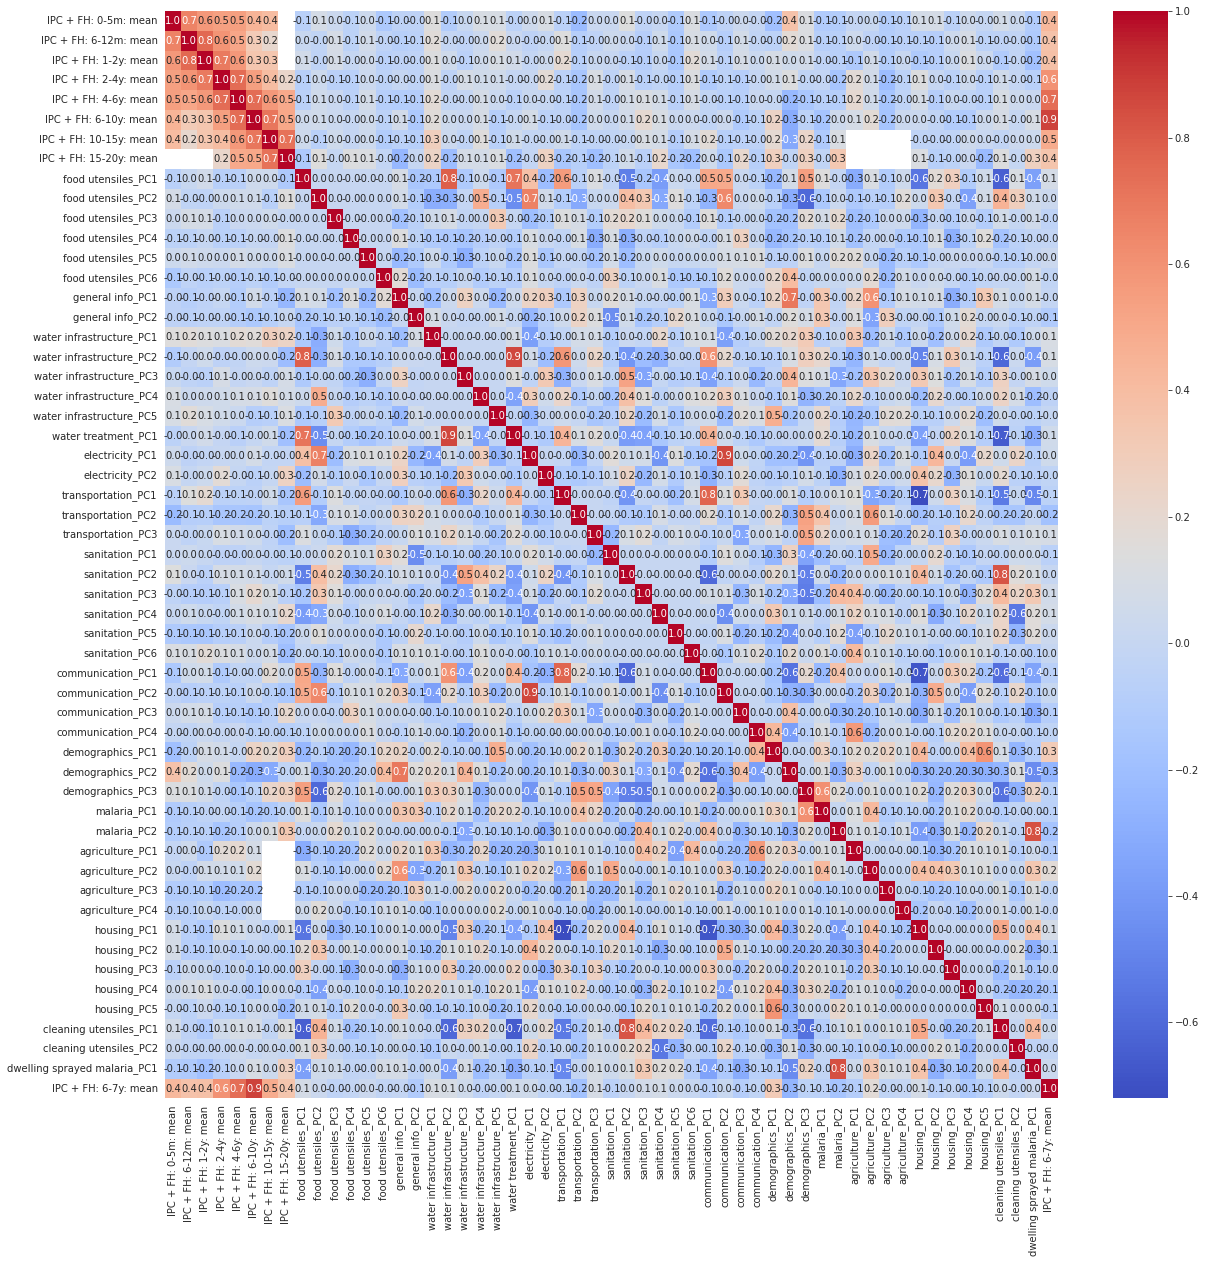

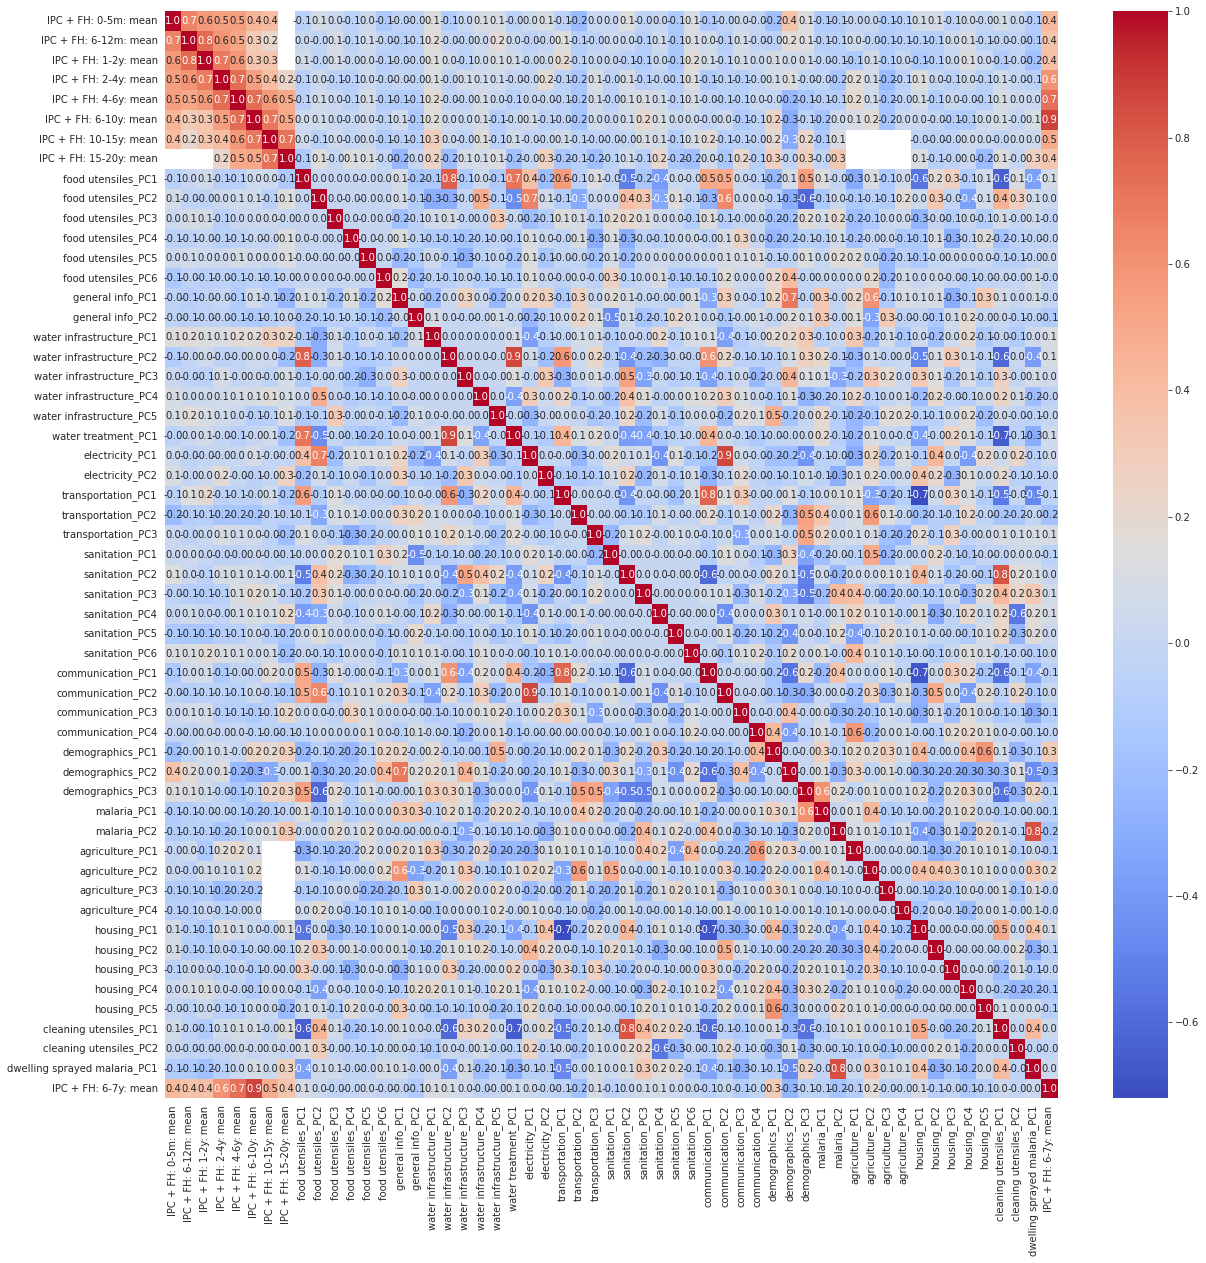

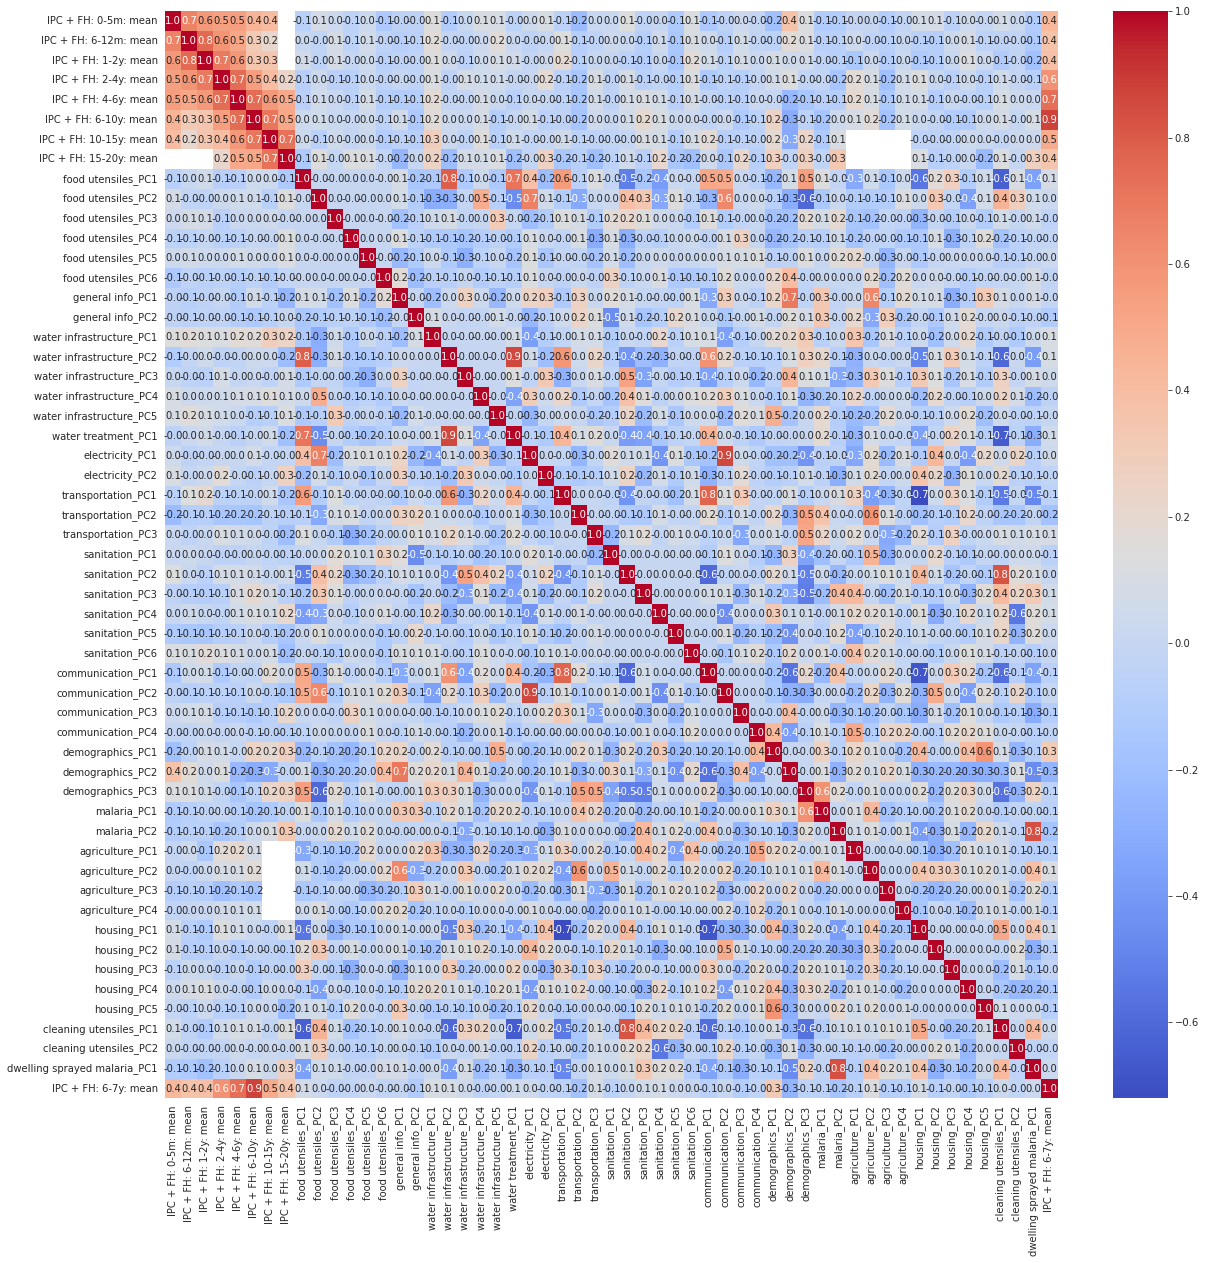

In [ ]:
for nr, pca_df in enumerate(pca_dfs_l):
    corr = pca_df.corr()
    sns.set_style("whitegrid")

    # ic(corr)
    plt.figure(figsize=(20, 20))
    # sns.heatmap(corr, annot=False, cmap=plt.cm.Reds, fmt=".2f")
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
    #save fig
    plt.savefig(f"{input_dir}IPC_correlation_matrix_cols: {nr}.png")

In [ ]:
# Initialize a DataFrame to store the principal components
pca_df = pd.DataFrame()
final_cols = []
for pca_l, final_n in [(pca_food, 'food utensiles'), (pca_general_info, 'general info'), (pca_water, 'water infrastructure'), (pca_water_treatment, 'water treatment'), 
            (pca_elecricity, 'electricity'), (pca_transportation, 'transportation'), (pca_sanitation, 'sanitation'), (pca_communication, 'communication'), 
            (pca_demographics, 'demographics'), (pca_malaria, 'malaria'), (pca_agriculture, 'agriculture'), 
            (pca_housing, 'housing'), (pca_cleaning_utensiles, 'cleaning utensiles'), (dwelling_sprayed_malaria, 'dwelling sprayed malaria')]:
        
    # Catch correct columns
    for col in pca_l:    
        subset = [c for c in combined_df.columns if col in c]
        final_col = col + ': ' + 'mean'
        if final_col in subset:
            #drop if NaNs amount below 50%
            if len(combined_df[final_col].dropna()) / len(combined_df[final_col]) > 0.5:
                print('numeric', final_col)
                final_cols.append(final_col)
        else:
            # subset = [c for c in subset if c[-3:] != 'NaN']
            for col in subset:
                if len(combined_df[col].dropna()) / len(combined_df[col]) > 0.5:
                    print('str', subset)
                    final_cols.append(col)
final_cols = list(set(final_cols))
    
print('final', len(final_cols), final_cols)    

# Select the subset of columns you're interested in
subset_df = combined_df[final_cols]

# Drop rows with NaNs from this subset
subset_df = subset_df.dropna()

# Capture the valid indices after dropping NaNs
valid_index = subset_df.index
# Now, you can use `subset_df` for PCA or further processing

standardized = subset_df.to_numpy()
# drop NaNs
standardized = standardized[~np.isnan(standardized).any(axis=1)]

# Assuming standardized DataFrame has been created and NaNs have been dropped

# Initialize PCA with a maximum of 3 components
n_components = min(10, standardized.shape[1])
pca = PCA(n_components=n_components)

# Apply PCA
principal_components = pca.fit_transform(standardized)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to keep
n_components_to_keep = np.argmax(cumulative_explained_variance > 0.8) + 1

# Find the number of components to keep
if np.any(cumulative_explained_variance > 0.8):
    n_components_to_keep = np.argmax(cumulative_explained_variance > 0.8) + 1
else:
    n_components_to_keep = min(len(cumulative_explained_variance), 10)
    

# Print the variance explained by the components to keep
for i in range(n_components_to_keep):
    print(f'Variance explained by {final_n}_PC{i+1}: {pca.explained_variance_ratio_[i]}')
print(f'Cumulative variance explained by {final_n}_PC1 to PC{n_components_to_keep}: {cumulative_explained_variance[n_components_to_keep-1]}')
print(len(pca.explained_variance_ratio_), n_components_to_keep)

# Convert the principal components to a DataFrame
principal_components_df = pd.DataFrame(data=principal_components[:, :n_components_to_keep], 
                                columns=[f'PC{i}' for i in range(1, n_components_to_keep + 1)],
                                index=valid_index)  # Use the valid indices here
print(len(principal_components_df))
# Now, when you merge, the indices should match up correctly
pca_df = pca_df.merge(principal_components_df, left_index=True, right_index=True, how='outer')

# Assuming 'IPC' is the column name for the IPC values in combined_df
pca_df = pca_df.merge(combined_df[[c for c in combined_df if 'IPC' in c]], left_index=True, right_index=True, how='outer')
sorted_cols = ['IPC + FH: 0-5m: mean',
                'IPC + FH: 6-12m: mean',
            'IPC + FH: 1-2y: mean',
            'IPC + FH: 2-4y: mean',
            'IPC + FH: 4-6y: mean',
            'IPC + FH: 6-10y: mean',
            'IPC + FH: 10-15y: mean',
            'IPC + FH: 15-20y: mean']
pca_df = pca_df[sorted_cols + [c for c in pca_df.columns if c not in sorted_cols]]
pca_df

str ['has refrigerator: NaN', 'has refrigerator: yes', 'has refrigerator: no']
str ['has refrigerator: NaN', 'has refrigerator: yes', 'has refrigerator: no']
str ['has refrigerator: NaN', 'has refrigerator: yes', 'has refrigerator: no']
str ['type of cooking fuel: NaN', 'type of cooking fuel: wood', 'type of cooking fuel: other', 'type of cooking fuel: no food cooked in house', 'type of cooking fuel: lpg', 'type of cooking fuel: kerosene', 'type of cooking fuel: firewood, straw', 'type of cooking fuel: electricity', 'type of cooking fuel: charcoal', 'type of cooking fuel: animal dung']
str ['type of cooking fuel: NaN', 'type of cooking fuel: wood', 'type of cooking fuel: other', 'type of cooking fuel: no food cooked in house', 'type of cooking fuel: lpg', 'type of cooking fuel: kerosene', 'type of cooking fuel: firewood, straw', 'type of cooking fuel: electricity', 'type of cooking fuel: charcoal', 'type of cooking fuel: animal dung']
str ['type of cooking fuel: NaN', 'type of cooking 

IPC + FH: 0-5m: mean  IPC + FH: 6-12m: mean  IPC + FH: 1-2y: mean  \
0                       NaN                    NaN                   NaN   
1                       NaN                    NaN                   NaN   
2                       NaN                    NaN                   NaN   
3                       NaN                    NaN                   NaN   
4                       NaN                    NaN                   NaN   
...                     ...                    ...                   ...   
15247              2.365511               3.355332              2.301224   
15248              3.316103               3.355332              2.301224   
15249              3.316103               3.355332              2.301224   
15250              1.414919               0.485189              0.120611   
15251              2.365511               3.355332              2.301224   

       IPC + FH: 2-4y: mean  IPC + FH: 4-6y: mean  IPC + FH: 6-10y: mean  \
0                       NaN                   NaN                    NaN   
1                       NaN                   NaN                    NaN   
2                       NaN                   NaN                    NaN   
3                       NaN                   NaN                    NaN   
4                       NaN                   NaN                    NaN   
...                     ...                   ...                    ...   
15247              2.813720              2.972896               2.586133   
15248              3.930720              3.325758               2.586133   
15249              2.813720              3.325758               2.586133   
15250              1.696721              0.502866              -0.603393   
15251              3.930720              3.325758               2.586133   

       IPC + FH: 10-15y: mean  IPC + FH: 15-20y: mean  PC1  PC2  PC3  PC4  \
0                         NaN                     NaN  NaN  NaN  NaN  NaN   
1                         NaN                     NaN  NaN  NaN  NaN  NaN   
2                         NaN                     NaN  NaN  NaN  NaN  NaN   
3                         NaN                     NaN  NaN  NaN  NaN  NaN   
4                         NaN                     NaN  NaN  NaN  NaN  NaN   
...                       ...                     ...  ...  ...  ...  ...   
15247                     NaN                     NaN  NaN  NaN  NaN  NaN   
15248                     NaN                     NaN  NaN  NaN  NaN  NaN   
15249                     NaN                     NaN  NaN  NaN  NaN  NaN   
15250                     NaN                     NaN  NaN  NaN  NaN  NaN   
15251                     NaN                     NaN  NaN  NaN  NaN  NaN   

       PC5  PC6  PC7  PC8  PC9  PC10  IPC + FH: 6-7y: mean  
0      NaN  NaN  NaN  NaN  NaN   NaN                   NaN  
1      NaN  NaN  NaN  NaN  NaN   NaN                   NaN  
2      NaN  NaN  NaN  NaN  NaN   NaN                   NaN  
3      NaN  NaN  NaN  NaN  NaN   NaN                   NaN  
4      NaN  NaN  NaN  NaN  NaN   NaN                   NaN  
...    ...  ...  ...  ...  ...   ...                   ...  
15247  NaN  NaN  NaN  NaN  NaN   NaN              2.490533  
15248  NaN  NaN  NaN  NaN  NaN   NaN              2.490533  
15249  NaN  NaN  NaN  NaN  NaN   NaN              2.490533  
15250  NaN  NaN  NaN  NaN  NaN   NaN             -0.562863  
15251  NaN  NaN  NaN  NaN  NaN   NaN              2.490533  

[15252 rows x 19 columns]

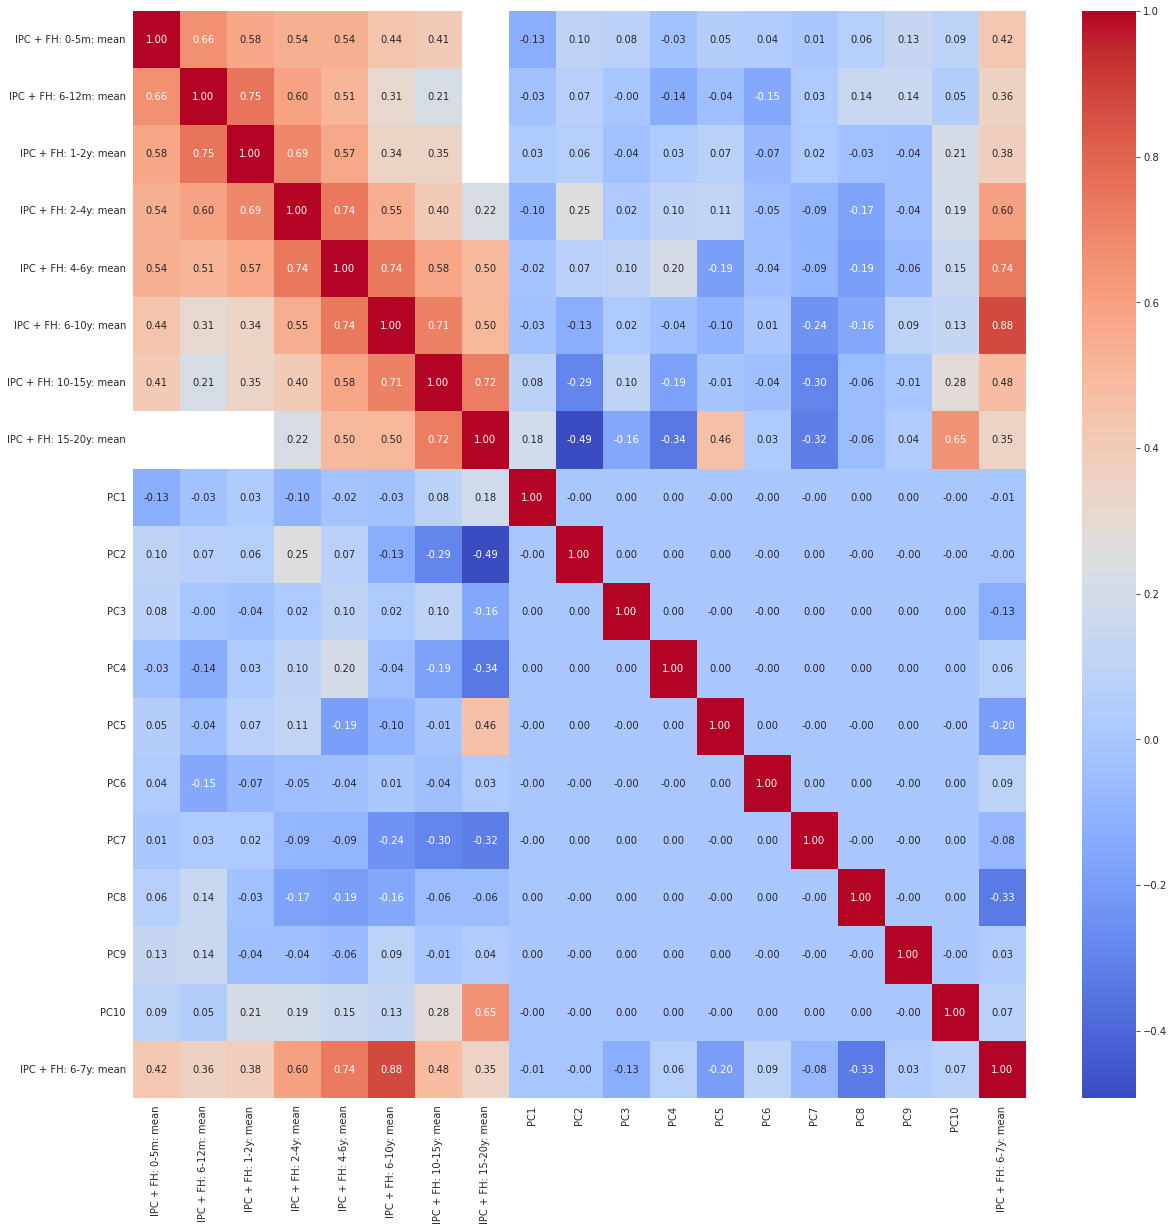

In [ ]:
corr = pca_df.corr()
sns.set_style("whitegrid")

# ic(corr)
plt.figure(figsize=(20, 20))
# sns.heatmap(corr, annot=False, cmap=plt.cm.Reds, fmt=".2f")
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
#save fig
plt.savefig(f"{input_dir}IPC_correlation_matrix_over_cols_above_50p.png")